# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Pranay Kuthe
##### **Team Member 2 -** Vipil Khapre


# **Project Summary -**

Cardiovascular disease is a leading cause of death worldwide, and early prediction of cardiovascular risk can help in timely intervention and prevention of the disease. Machine learning techniques have shown promising results in predicting cardiovascular risk by analyzing various risk factors. The classification goal is to predict whether
the patient has a 10-year risk of future coronary heart disease (CHD). The
dataset provides the patients’ information. It includes over 4,000 records and
15 attributes. Each attribute is a potential risk factor. There are both
demographic, behavioral, and medical risk factors.
Visting hospitals for regular check-ups it is almost always seen that they encourage people to get special check-ups to identify if they are at the risk of heart diseases. Heart diseases have unfortunately become very common. It may be due to various reasons such as lifestyle, work pressure, lack of exercise etc. In this project, we will be working on predicting 10 year risk of Coronary Heart Disease (CHD). We are given a set of variables which impact heart diseases. These variables are related to demographic, past and current medical history.

# **Project Summary -**

**The main aim of the project is to predict the risk of Coronary Heart Disease (CHD) given a set of variables. The prediction can be of 2 types, Yes or No.**

# **GitHub Link -**

https://github.com/Vipilkhapre/Cardiovascular-Risk-Prediction

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python_For_DS_Week1_11 01 23/Projects/ML/data_cardiovascular_risk.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns available in the dataset")

There are 3390 rows and 17 columns available in the dataset


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
preserved_data = df.copy()

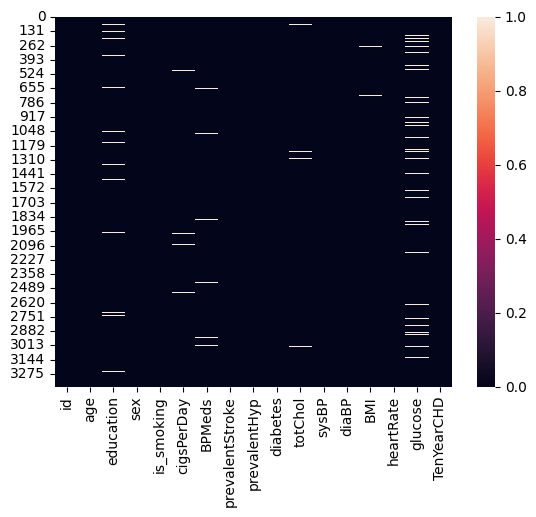

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isna());

### What did you know about your dataset?

The dataset contains a mix of numerical and categorical columns. It appears that there are missing values in some columns, as indicated by the "Non-Null Count" and the summary provided showing the count of missing values for each column. Additionally, there are no duplicate rows in the dataset.

It seems like this dataset could potentially be used for analyzing the factors associated with coronary heart disease risk and making predictions based on the given attributes. Further exploration and preprocessing might be necessary to handle the missing values and to prepare the data for analysis or modeling.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description

- **Sex:** male or female ("M" or "F")
- **Age:** Age of the patient (Continuous) - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous


- **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")
- **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day (Continuous) - can be considered continuous as one can have any number of cigarettes, even half a cigarette.


- **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)
- **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)
- **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)
- **Diabetes:** whether or not the patient had diabetes (Nominal)



- **Tot Chol:** total cholesterol level (Continuous)
- **Sys BP:** systolic blood pressure (Continuous)
- **Dia BP:** diastolic blood pressure (Continuous)
- **BMI:** Body Mass Index (Continuous)
- **Heart Rate:** heart rate (Continuous) - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of the large number of possible values.
- **Glucose:** glucose level (Continuous)

- **10-year risk of coronary heart disease (CHD):** Binary target variable ("1" means "Yes", "0" means "No")

Please note that "Continuous" variables represent numeric measurements, "Nominal" variables represent categorical data with no inherent order, and the "Binary" variable represents a two-class classification target.


### Check Number of Unique Values for each variable.

In [ ]:
# Check No. of Unique Values for each variable.
for i in df.columns:
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in id is 3390
No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


In [ ]:
# checking categorical values for each variable.
for i in df.select_dtypes(object).columns:
  print(i,' - ',df[i].unique())

sex  -  ['F' 'M']
is_smoking  -  ['YES' 'NO']


## 3. ***Data Cleaning***

In [ ]:
# Dropping id column as doesn't need for analysis
df.drop('id', axis=1, inplace=True)

In [ ]:
df.head(2)

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   

   TenYearCHD  
0           1  
1           0

In [ ]:
df.isna().sum()[df.isna().sum()>0]

education      87
cigsPerDay     22
BPMeds         44
totChol        38
BMI            14
heartRate       1
glucose       304
dtype: int64

In [ ]:
df.education.value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [ ]:
df.BPMeds.value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [ ]:
# Creating a function to fill null values of categorical columns with mode
def mode_fillna(df, cols):
    ''' Null values of categorical columns are filled with the mode of the column'''
    for col in cols:
        df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
mode_fillna(df, cols=['education','BPMeds'])

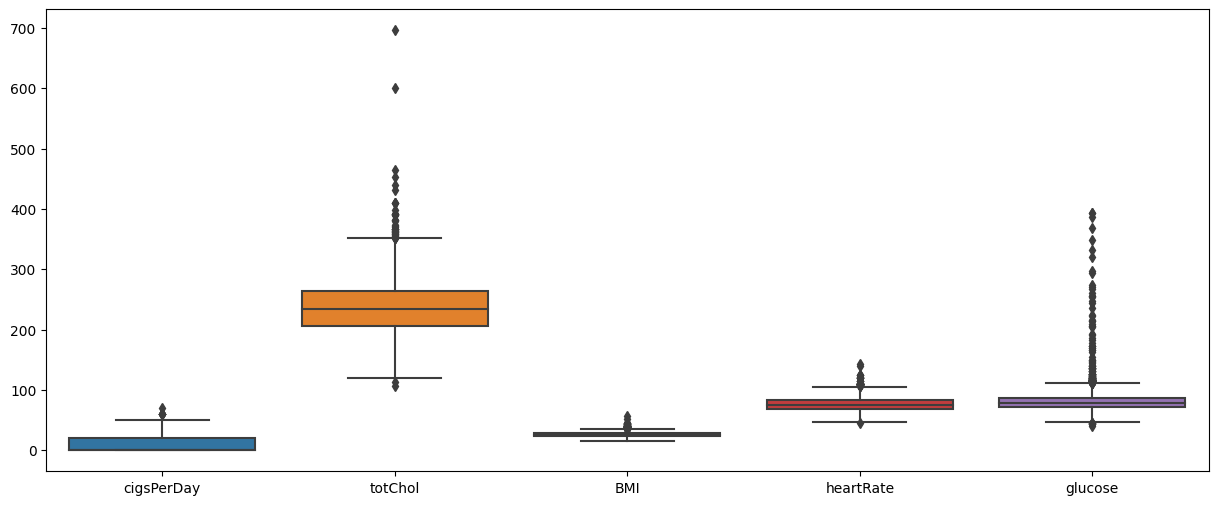

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df[['cigsPerDay', 'totChol','BMI','heartRate','glucose']]);

In [ ]:
# Creating a function to fill null values of continous columns with median
def median_fillna(df, cols):
    ''' Null values of continous columns are filled with the median of the column '''
    for col in cols:
        df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
median_fillna(df, cols = ['cigsPerDay', 'totChol','BMI','heartRate','glucose'] )

In [ ]:
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**All null values have been successfully filled strategically.**

In [ ]:
# No cigarettes smoked throughout the day but in the smoking column it is yes so, it needs to be managed.
df[ (df['is_smoking'] == 'YES') & (df['cigsPerDay'] ==0) ]

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
422    55        1.0   F        YES         0.0     0.0                0   
466    45        3.0   M        YES         0.0     0.0                0   
469    42        1.0   M        YES         0.0     0.0                0   
491    61        1.0   F        YES         0.0     0.0                0   
538    41        1.0   F        YES         0.0     0.0                0   
767    54        1.0   M        YES         0.0     0.0                0   
1461   47        2.0   F        YES         0.0     0.0                0   
1467   49        1.0   F        YES         0.0     0.0                0   
1597   57        1.0   F        YES         0.0     0.0                0   
1986   49        2.0   F        YES         0.0     0.0                0   
2031   58        4.0   F        YES         0.0     0.0                0   
2087   49        4.0   M        YES         0.0     0.0                0   
2240   47        3.0   F        YES         0.0     0.0                0   
2284   45        2.0   M        YES         0.0     0.0                0   
2527   58        2.0   M        YES         0.0     0.0                0   
2638   57        1.0   M        YES         0.0     0.0                0   
2648   39        2.0   M        YES         0.0     0.0                0   
2723   43        4.0   M        YES         0.0     0.0                0   
2879   42        1.0   M        YES         0.0     0.0                0   
2945   53        2.0   M        YES         0.0     0.0                0   
3301   55        1.0   M        YES         0.0     0.0                0   
3378   39        3.0   F        YES         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
422              1         0    213.0  163.0   91.0  28.66       69.0   
466              1         0    170.0  145.5   99.0  26.74       83.0   
469              0         0    196.0  123.0   73.0  22.06       66.0   
491              1         0    356.0  168.0   98.0  27.30      103.0   
538              0         0    171.0  135.0   82.5  24.35       79.0   
767              0         0    219.0  110.0   72.0  26.05       95.0   
1461             0         0    365.0  127.0   76.0  24.44       72.0   
1467             0         0    252.0  123.0   69.0  21.45       72.0   
1597             0         0    229.0  115.0   69.0  24.43       80.0   
1986             1         0    233.0  158.0  102.0  25.31       90.0   
2031             1         0    270.0  195.0  117.5  23.35       75.0   
2087             0         0    256.0  127.5   81.5  28.21       93.0   
2240             0         0    321.0  132.0   88.0  28.14       90.0   
2284             0         0    248.0  121.0   72.0  27.88       64.0   
2527             0         0    235.0  127.5   76.0  21.02       81.0   
2638             0         0    223.0  107.5   72.5  24.74       62.0   
2648             0         0    285.0  121.0   82.0  27.62       85.0   
2723             0         0    222.0  109.5   69.0  25.50       75.0   
2879             0         0    226.0  119.0   80.0  25.29       62.0   
2945             0         0    276.0  130.0   86.0  24.21       58.0   
3301             0         0    214.0  132.5   85.5  29.25       70.0   
3378             0         0    197.0  126.5   76.5  19.71       55.0   

      glucose  TenYearCHD  
422      66.0           0  
466      85.0           0  
469      75.0           0  
491     106.0           0  
538      82.0           0  
767      86.0           0  
1461     80.0           0  
1467     89.0           0  
1597     93.0           0  
1986     72.0           0  
2031     75.0           0  
2087     85.0           1  
2240     74.0           0  
2284     88.0           0  
2527    135.0           0  
2638    103.0           0  
2648     65.0           0  
2723     75.0           0  
2879     98.0           0  
2945     82.0    

*No cigarettes smoked throughout the day but in the smoking column it is yes so, it needs to be managed.*

In [ ]:
rows_to_update = (df['is_smoking'] == 'YES') & (df['cigsPerDay'] ==0)
df.loc[rows_to_update, 'is_smoking'] ='NO'

In [ ]:
df[ (df['is_smoking'] == 'YES') & (df['cigsPerDay'] ==0) ]

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

In [ ]:
df[ (df['is_smoking'] == 'NO') & (df['cigsPerDay'] ==1)]

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

In case of is_smoking == 'NO' column is correctly mapped with cigarettes per day column.

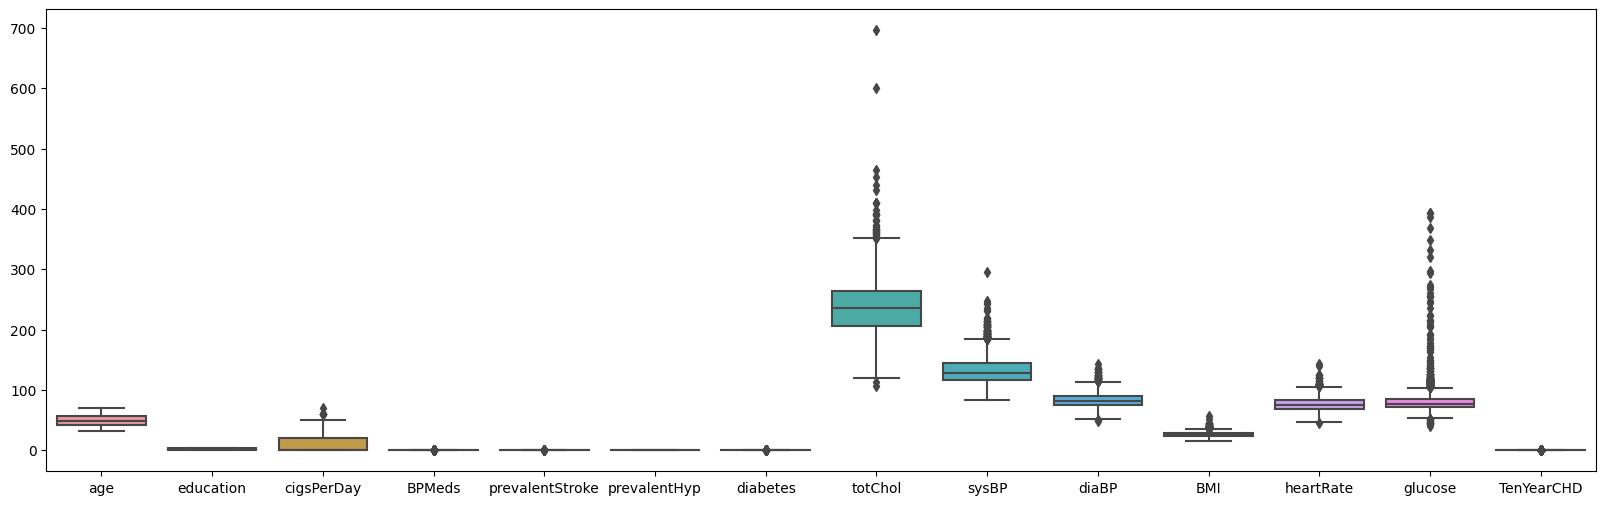

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df);

In [ ]:
numeric_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 10 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in df.columns:
  if df[col].nunique() > 10:
    numeric_features.append(col)
  else:
    categorical_features.append(col)

print(f'numeric feature : {numeric_features}')
print(f'category feature : {categorical_features}')

numeric feature : ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
category feature : ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


In [ ]:
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  22.91       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
d = pd.DataFrame(df.groupby('sex')['is_smoking'].value_counts().reset_index(name='No.of People'))
pivot_table = d.pivot(index='sex', columns='is_smoking', values='No.of People')
pivot_table.columns = ['No.of People - No Smoking', 'No.of People - Smoking']
pivot_table.reset_index()

sex  No.of People - No Smoking  No.of People - Smoking
0   F                       1157                     766
1   M                        568                     899

In [ ]:
avg_chd_risk_by_education = df.groupby('education',as_index=False)['TenYearCHD'].mean()
avg_chd_risk_by_education.rename(columns={'TenYearCHD':'Avg_Child_Risk'})

education  Avg_Child_Risk
0        1.0        0.182003
1        2.0        0.119192
2        3.0        0.127505
3        4.0        0.144772

In [ ]:
max_bmi_by_smoking = df.groupby('is_smoking',as_index=False)['BMI'].max()
max_bmi_by_smoking.rename(columns={'BMI':'Avg_BMI'})

is_smoking  Avg_BMI
0         NO    56.80
1        YES    44.27

In [ ]:
df.groupby('diabetes',as_index=False)['sysBP'].median()

diabetes  sysBP
0         0  128.0
1         1  146.0

The median systolic blood pressure for individuals without diabetes is 128.0 mmHg. This value represents the middle blood pressure value for non-diabetic individuals in the dataset.

The median systolic blood pressure for individuals with diabetes is 146.0 mmHg. This value represents the middle blood pressure value for diabetic individuals in the dataset.

The difference in median systolic blood pressure between individuals with and without diabetes is 146.0 - 128.0 = 18.0 mmHg. This suggests that, on average, individuals with diabetes might have a higher systolic blood pressure compared to those without diabetes.

In [ ]:
custom_aggregations = {
    'age': 'mean',
    'BMI': 'max',
    'heartRate': 'min'
}
summary_by_gender = df.groupby('sex').agg(custom_aggregations)
summary_by_gender

age    BMI  heartRate
sex                             
F    49.856474  56.80       47.0
M    49.130198  40.38       45.0

The provided data has been grouped by gender (Females and Males), and key statistics have been calculated for each group. On average, females in the dataset are slightly older (49.86 years) than males (49.13 years). Additionally, females have a higher average BMI (56.80) compared to males (40.38). In terms of heart rate, females exhibit a slightly higher average heart rate (47.0 beats per minute) than males (45.0 beats per minute). These findings suggest potential gender-based differences in age, BMI, and heart rate within the dataset, though further analysis might be needed to validate the significance of these distinctions and explore underlying factors.

In [ ]:
df.groupby(['education','diabetes'])['totChol'].mean()

education  diabetes
1.0        0           238.183415
           1           242.636364
2.0        0           235.359343
           1           283.937500
3.0        0           235.957328
           1           271.200000
4.0        0           235.386921
           1           241.666667
Name: totChol, dtype: float64

In [ ]:
avg_total_cholestrol = df.pivot_table(values='totChol', index=['education', 'diabetes'],columns='sex', aggfunc=np.mean)
avg_total_cholestrol

sex                          F           M
education diabetes                        
1.0       0         241.791083  233.744514
          1         252.966667  230.240000
2.0       0         236.782759  233.263959
          1         302.454545  243.200000
3.0       0         237.800000  232.251397
          1         274.333333  266.500000
4.0       0         238.543046  233.180556
          1                NaN  241.666667

In [ ]:
df.groupby(['is_smoking','sex'], as_index=False)['heartRate'].max()

is_smoking sex  heartRate
0         NO   F      143.0
1         NO   M      125.0
2        YES   F      122.0
3        YES   M      120.0

In [ ]:
df1 = df.copy()

In [ ]:
# Define the age bins and labels for the age groups
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Create a new column 'age_group' with the age groups
df1['age_group'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, right=False)

# Group by age groups and calculate median systolic blood pressure
blood_pressure_summary = df1.groupby('age_group', as_index=False)['sysBP'].median()

blood_pressure_summary.sysBP = blood_pressure_summary.sysBP.fillna(0)

blood_pressure_summary.rename(columns={'sysBP':'median systolic blood pressure '})

age_group  median systolic blood pressure 
0     20-30                              0.0
1     31-40                            119.0
2     41-50                            125.0
3     51-60                            134.0
4     61-70                            144.0
5     71-80                            139.5
6     81-90                              0.0

In [ ]:
df.groupby('TenYearCHD')[['BMI','glucose']].mean()

BMI    glucose
TenYearCHD                      
0           25.672831  80.141716
1           26.404031  88.827789

In [ ]:
# Define the number of quartiles
num_quartiles = 4

# Create BMI quartiles
df1['bmi_quartile'] = pd.qcut(df1['BMI'], q=num_quartiles)

# Group by BMI quartiles and calculate median heart rate
heart_rate_summary = df1.groupby('bmi_quartile',as_index=False)['heartRate'].median()

heart_rate_summary

bmi_quartile  heartRate
0  (15.959000000000001, 22.972]       75.0
1              (22.972, 25.365]       75.0
2              (25.365, 27.998]       75.0
3                (27.998, 56.8]       75.0

In [ ]:
# Defining 3 lists containing the column names of
# This is defined based on the number of unique values for each attribute
categorical_var = [i for i in df.columns if df[i].nunique()<=4]
continuous_var = [i for i in df.columns if i not in categorical_var]

print('categorical_var ->',categorical_var,'\n')
print('continuous_var ->',continuous_var)

categorical_var -> ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD'] 

continuous_var -> ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

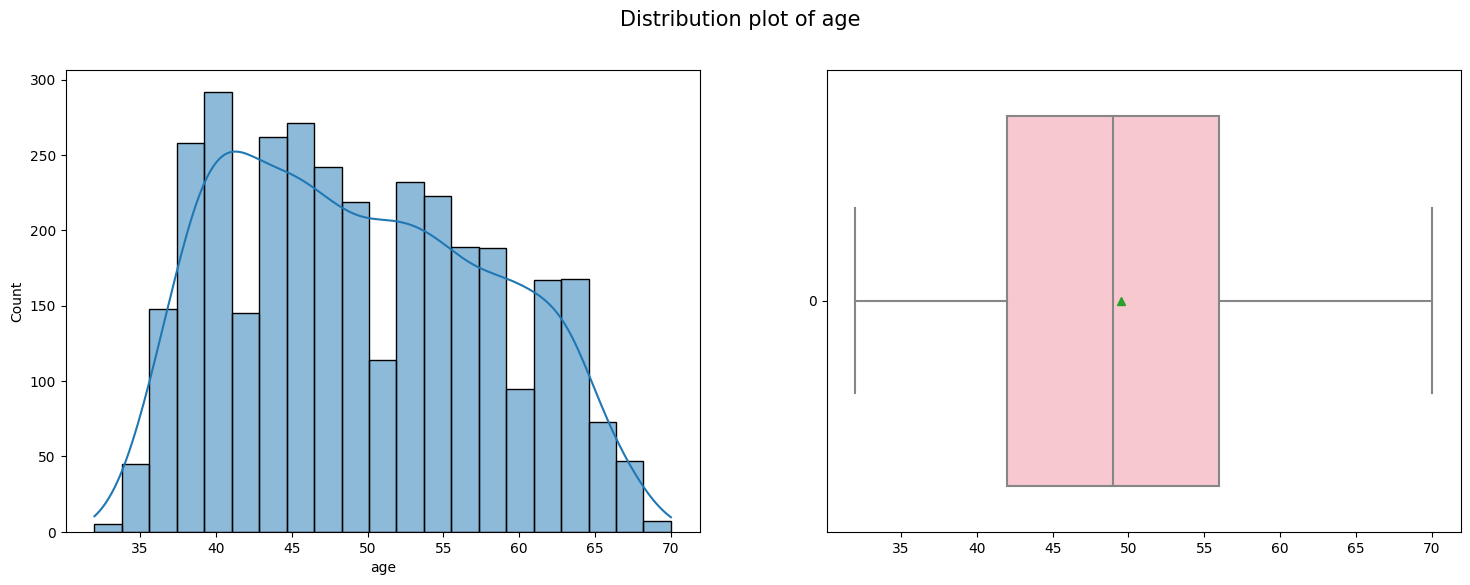

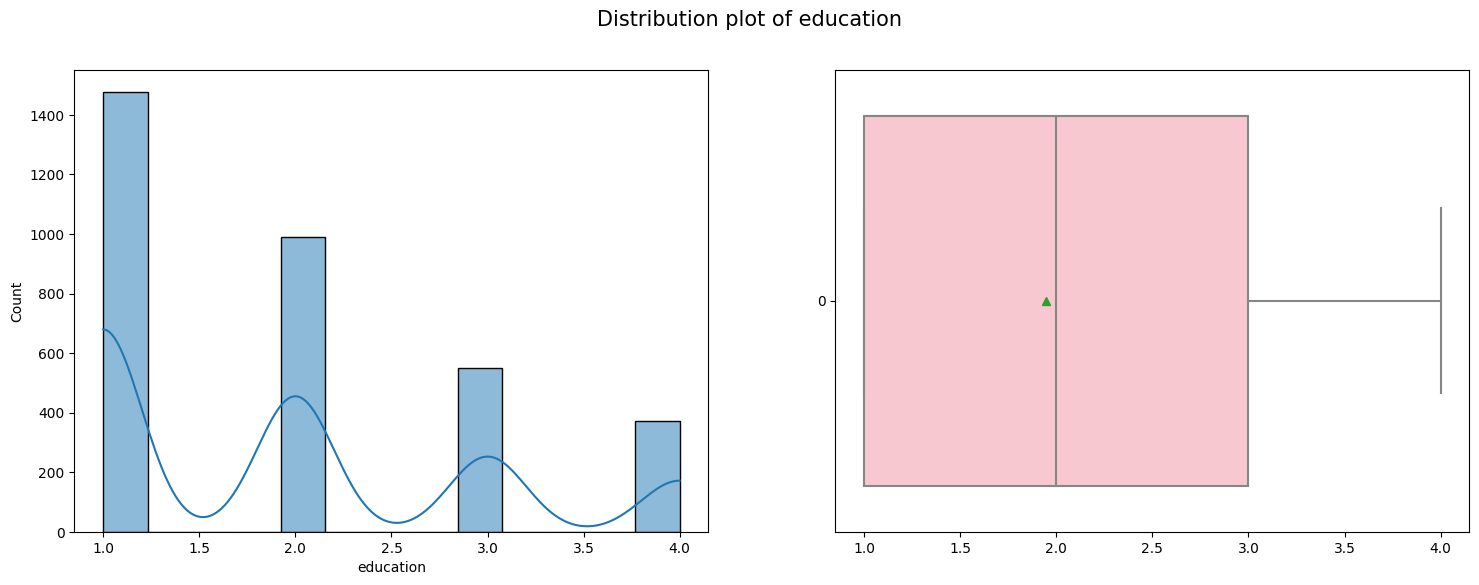

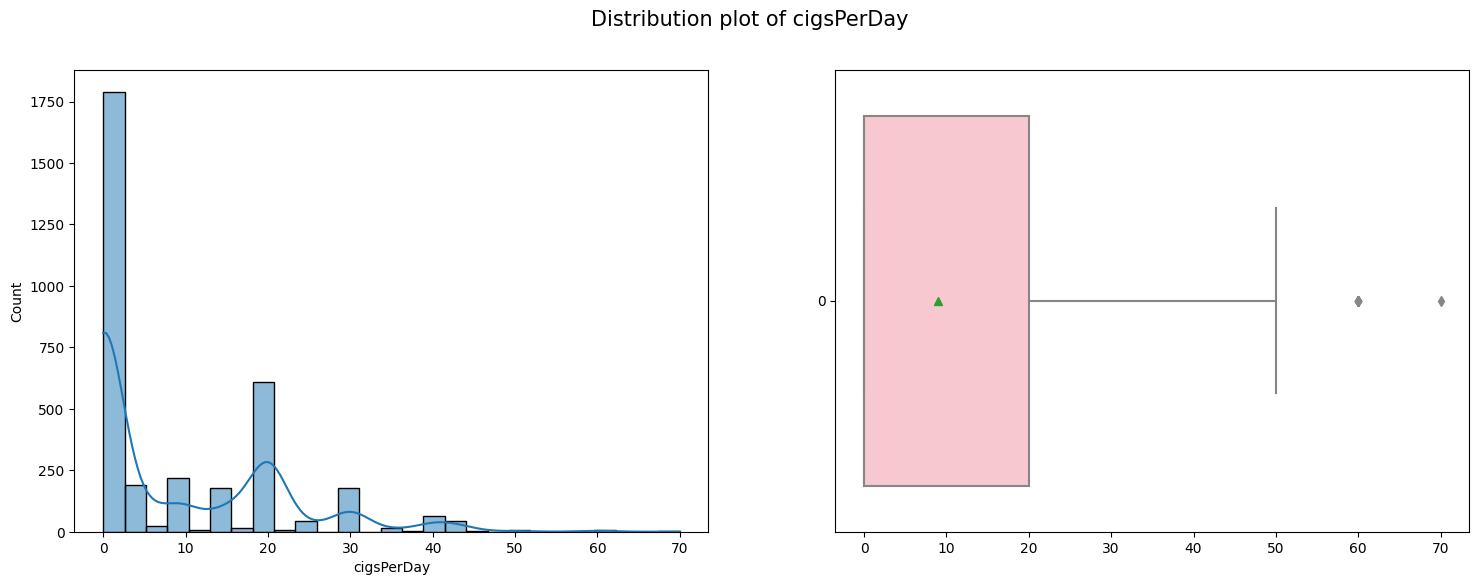

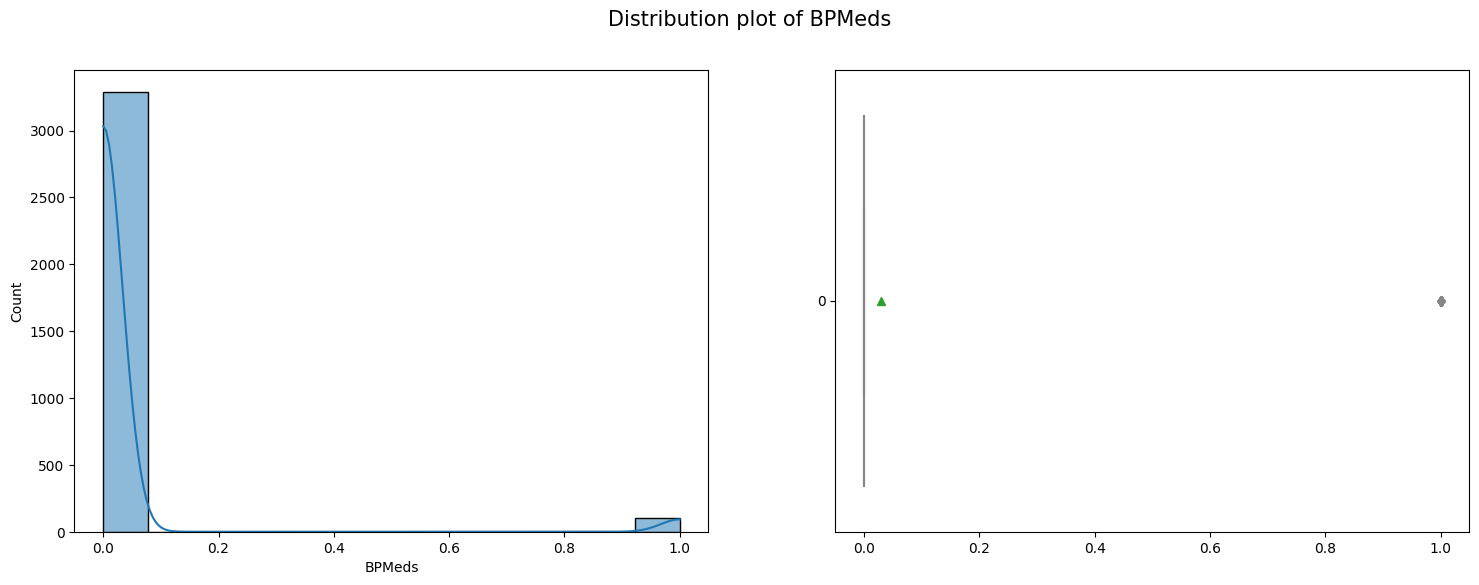

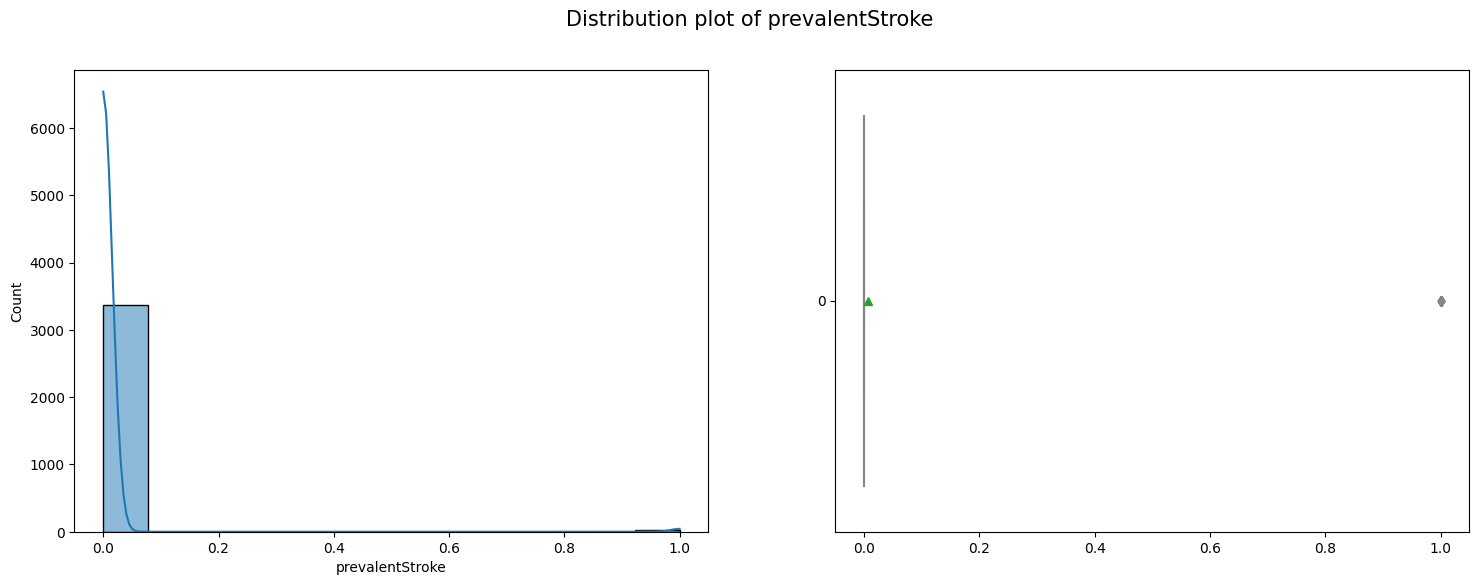

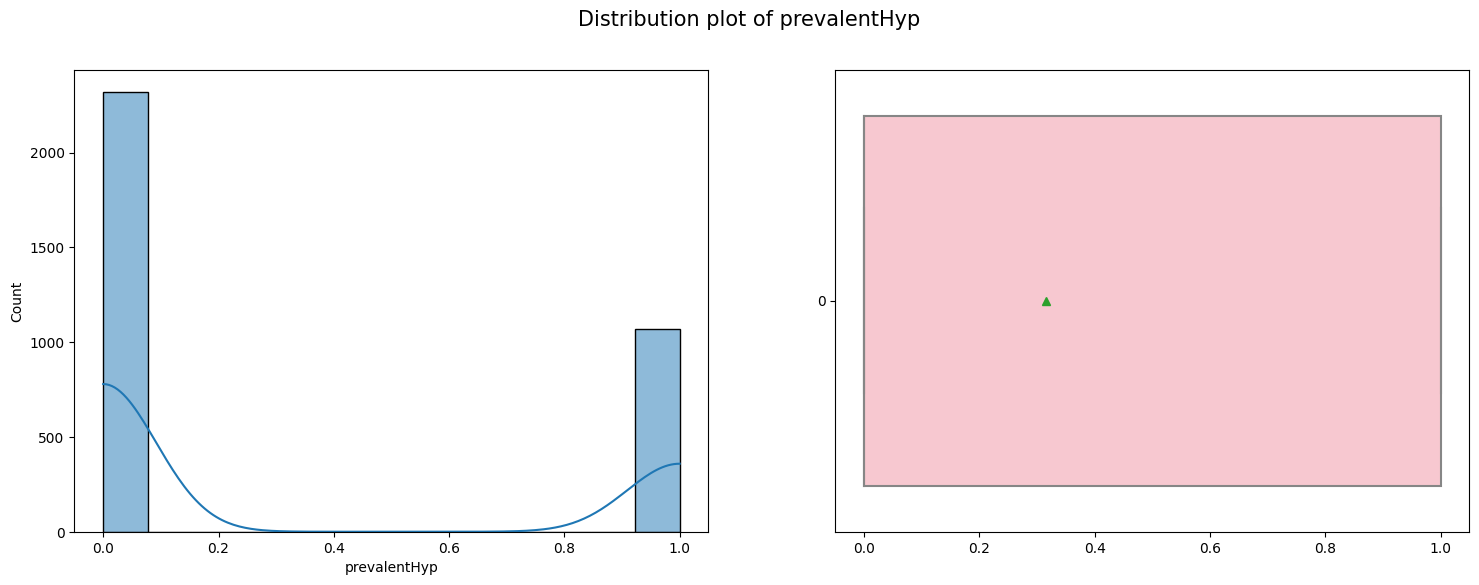

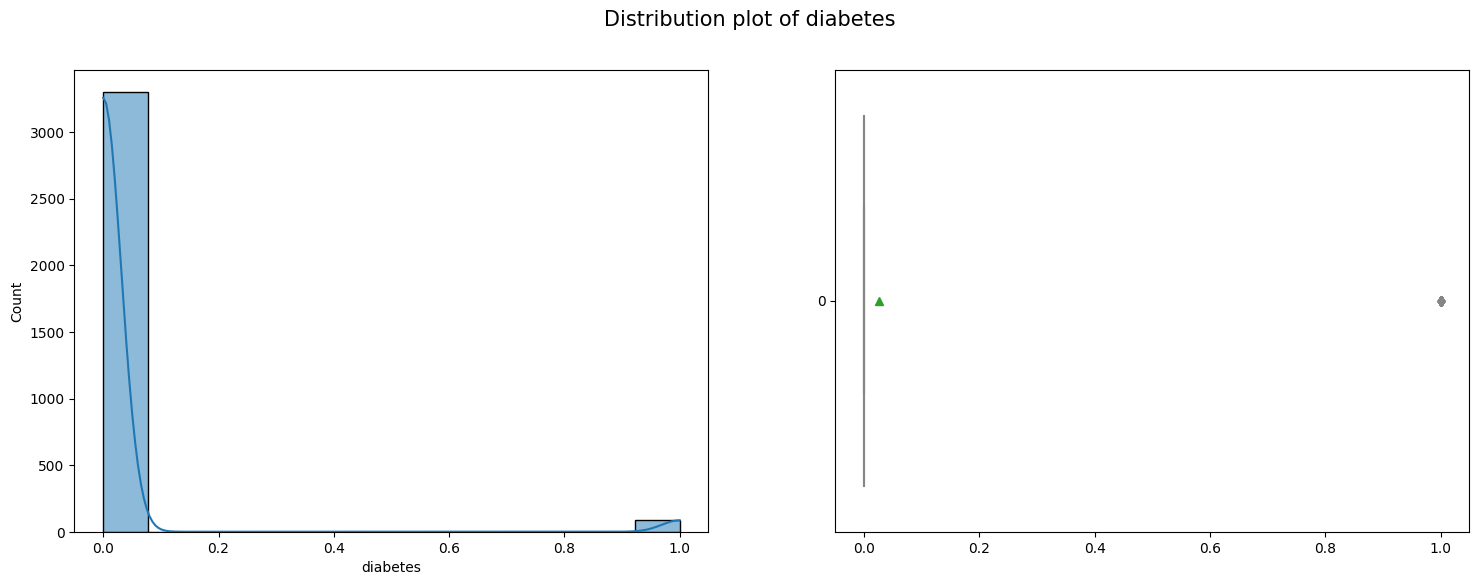

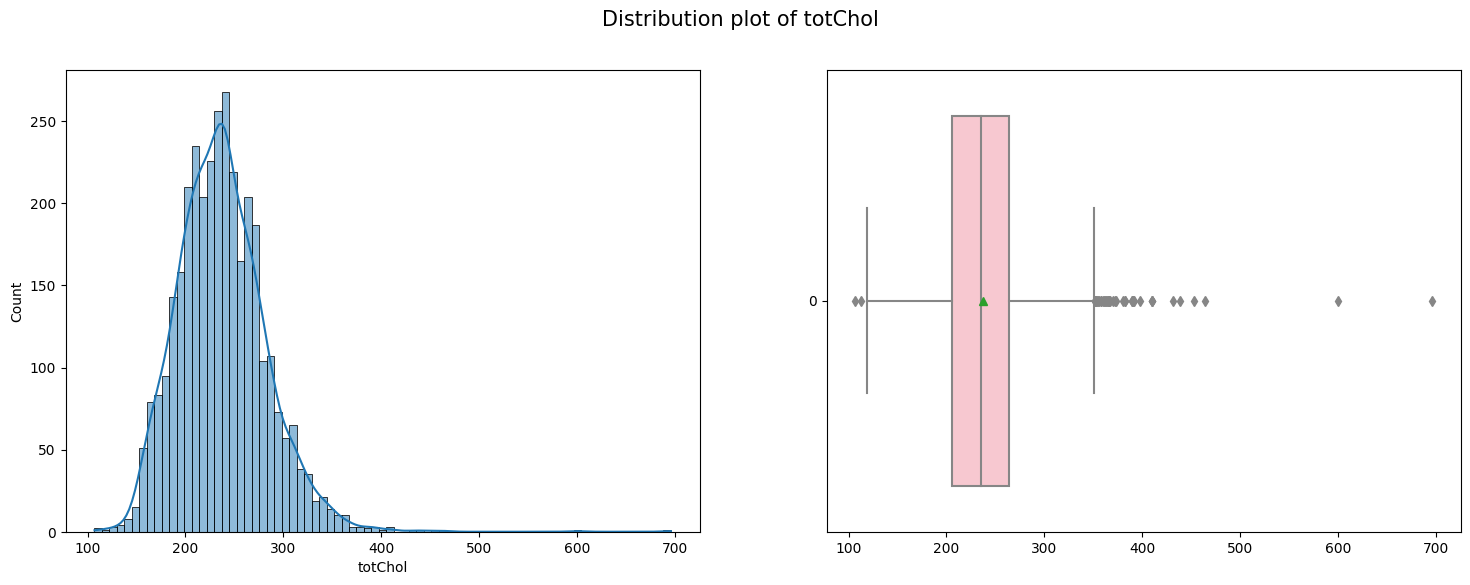

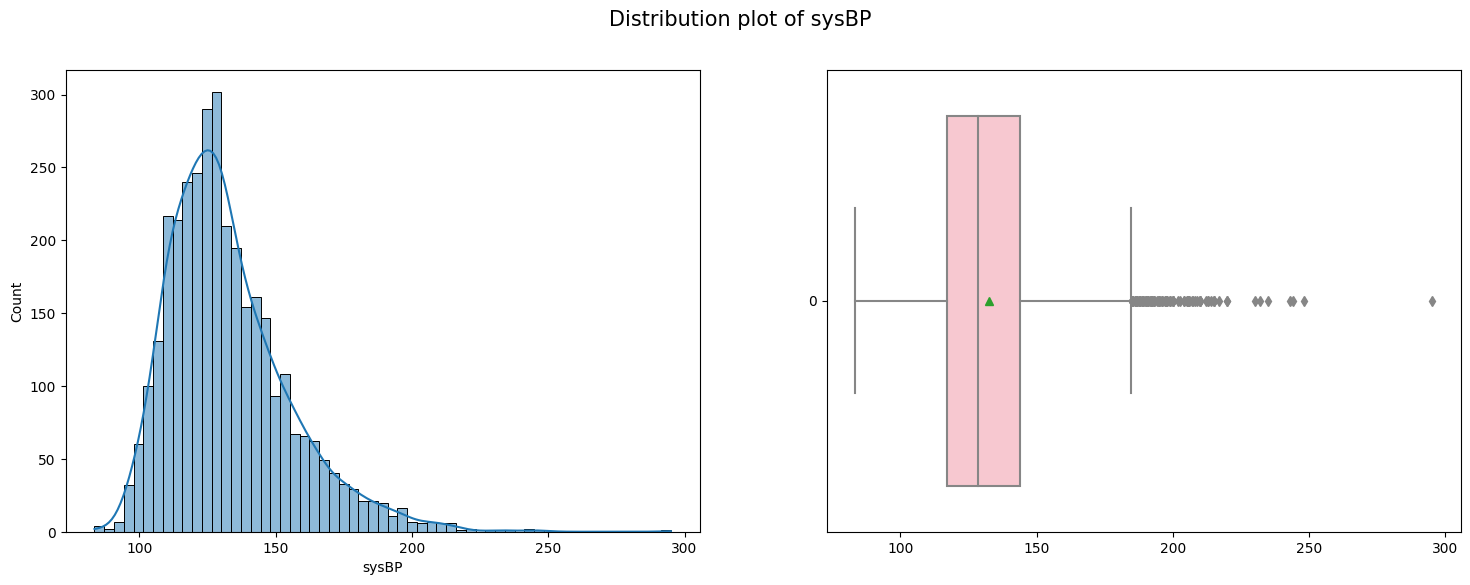

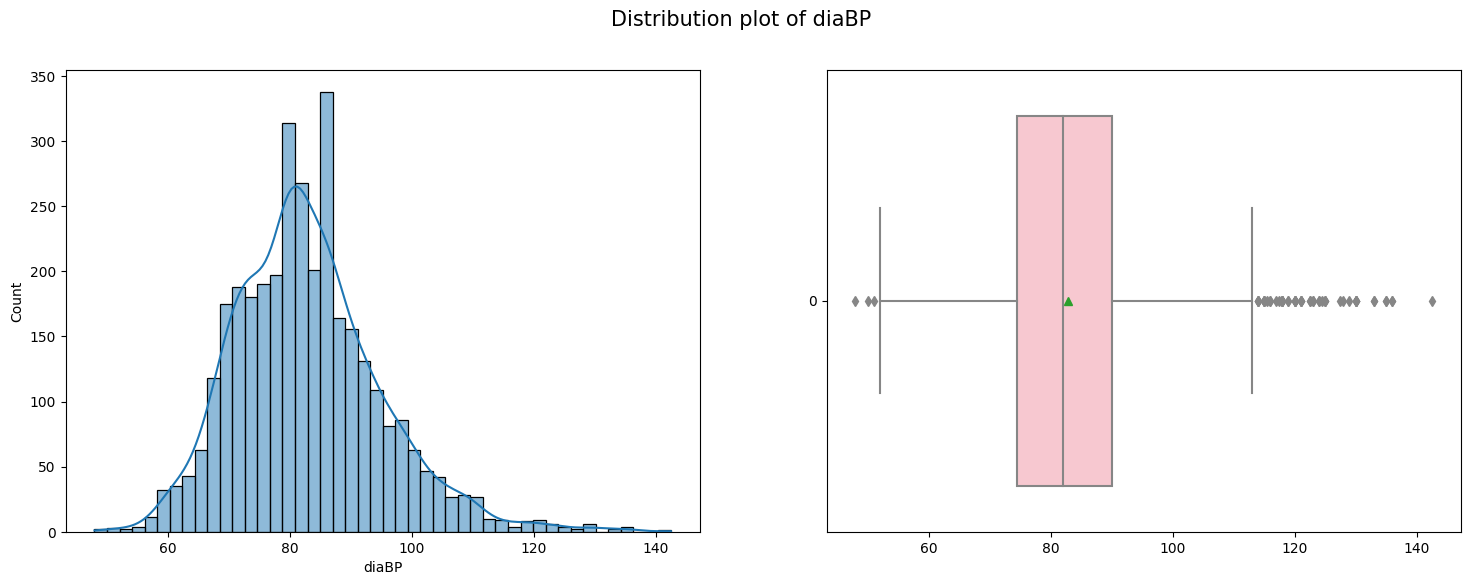

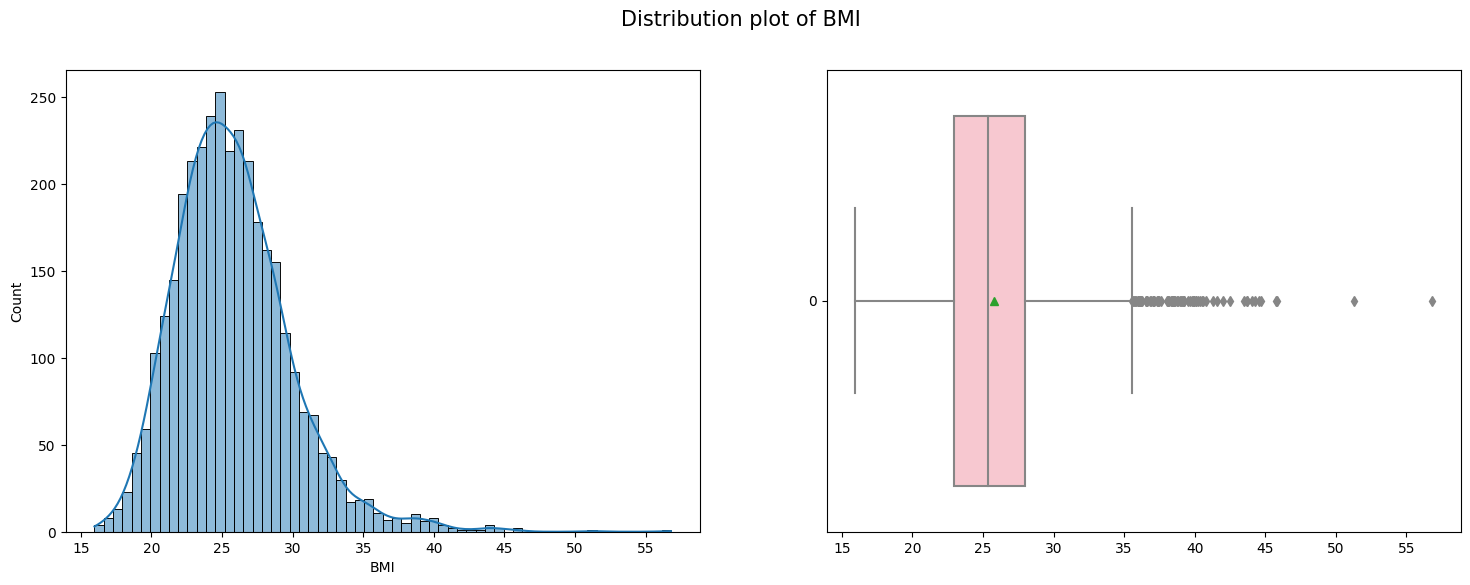

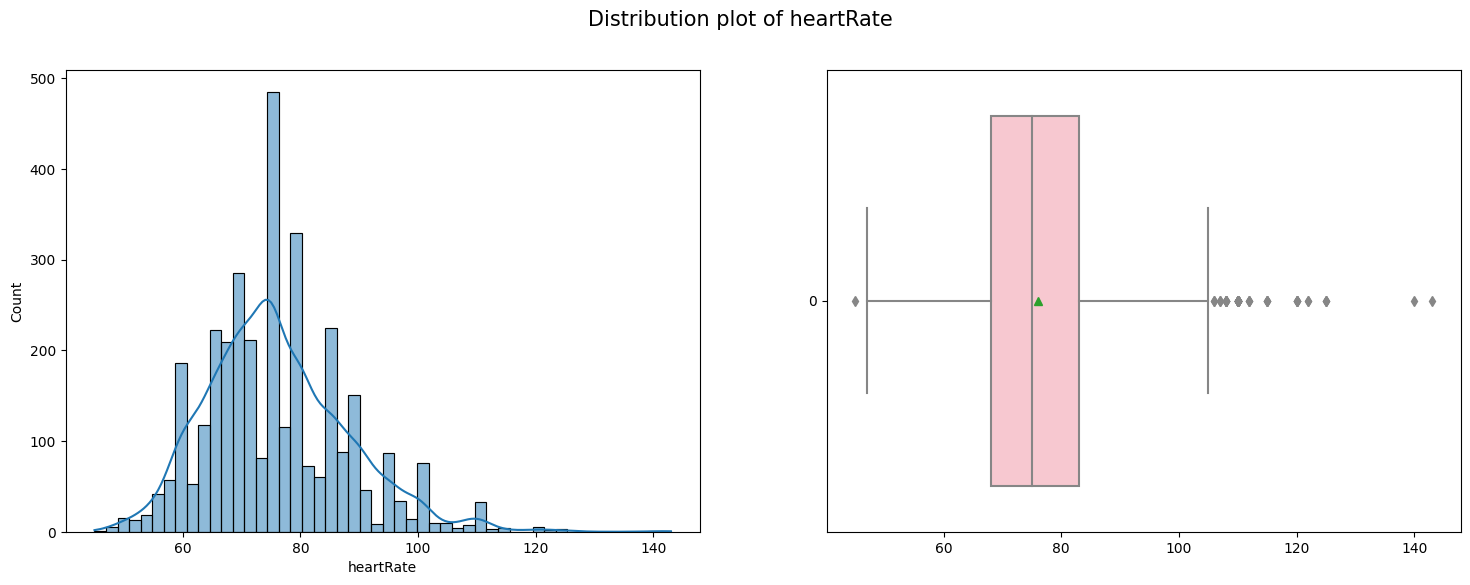

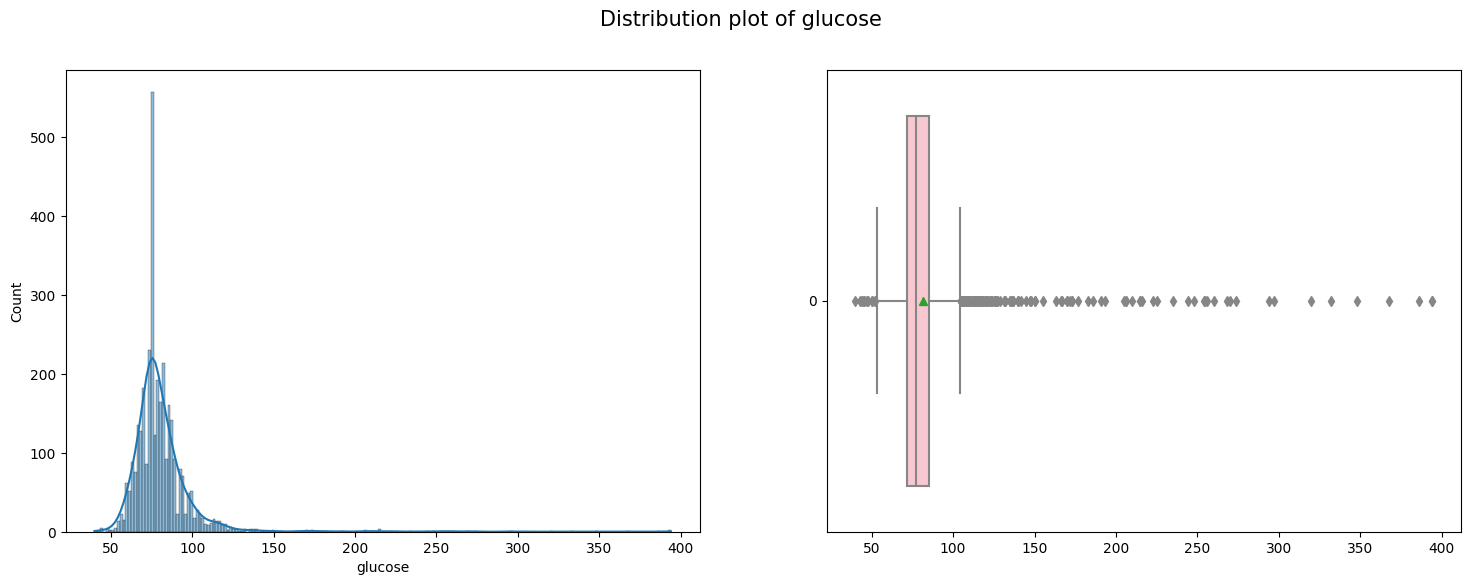

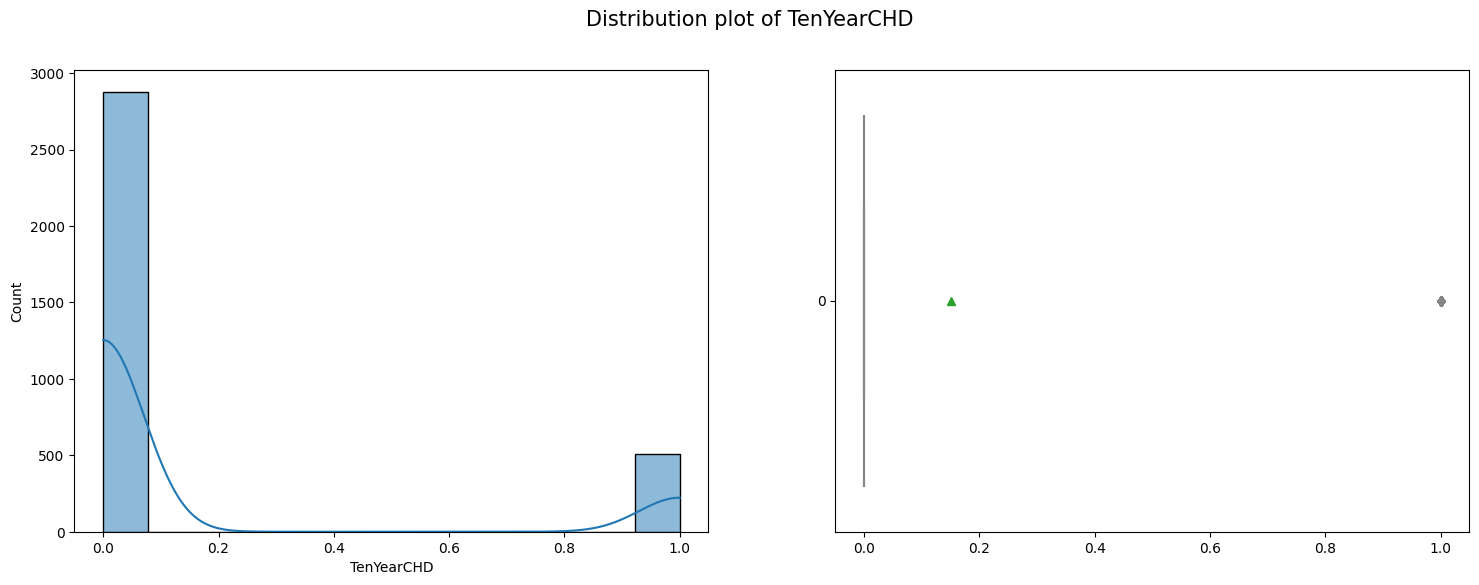

In [ ]:
# Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in df.select_dtypes([int,float]).columns:
    fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
    sns.histplot(df[col], ax = axes[0], kde=True)
    sns.boxplot(df[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

From the distribution we see that most of the columns are normally distributed, some of them are skewed and we can see some of the categorical columns also. In the box plot, we see some outliers also which we will handle later before model building.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset and the outliers in the boxplot for the different continuous columns.

#### Chart - 2

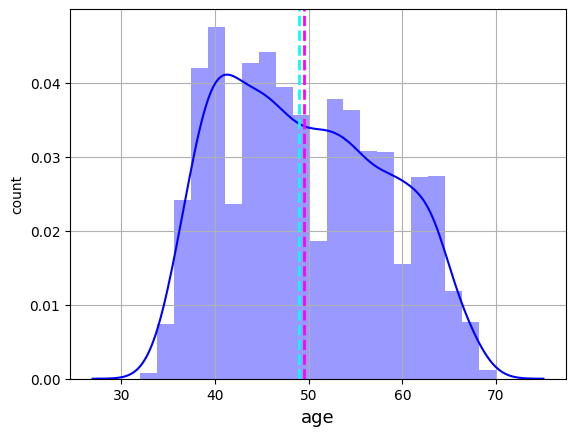

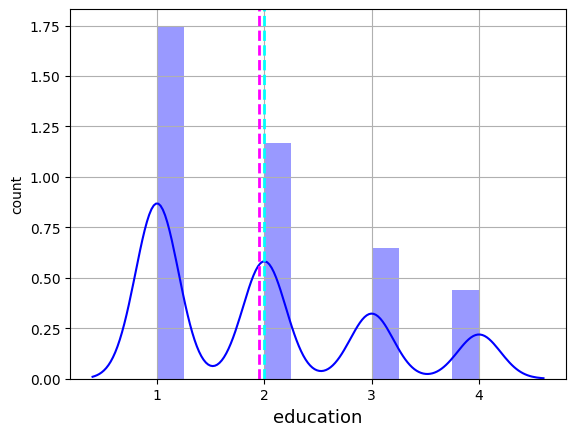

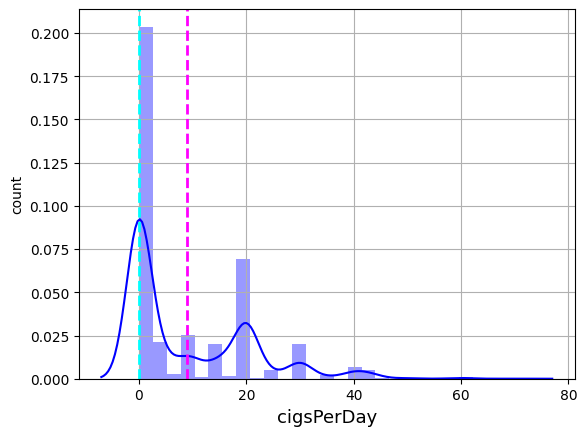

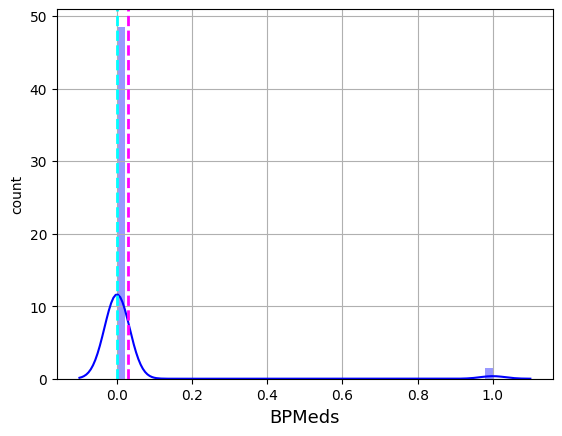

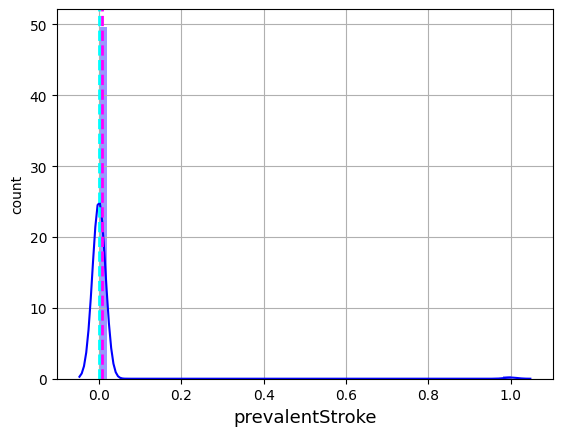

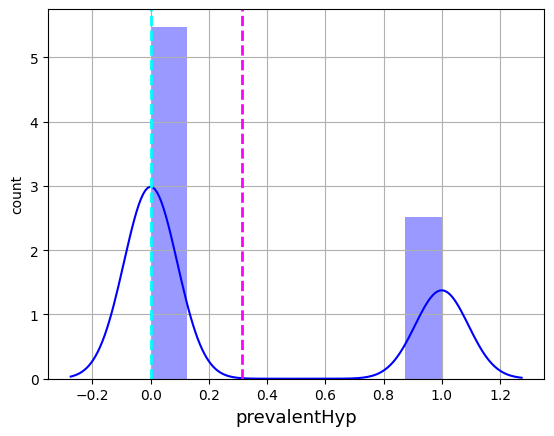

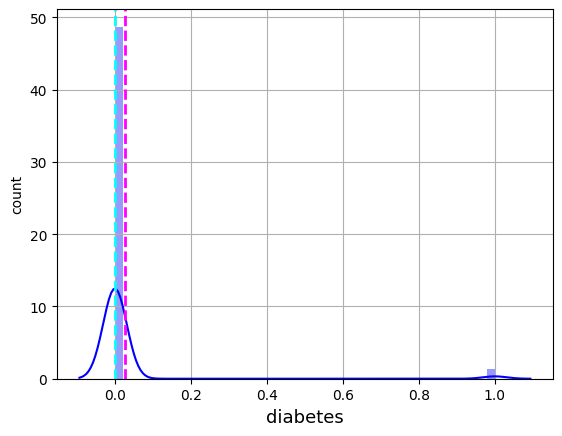

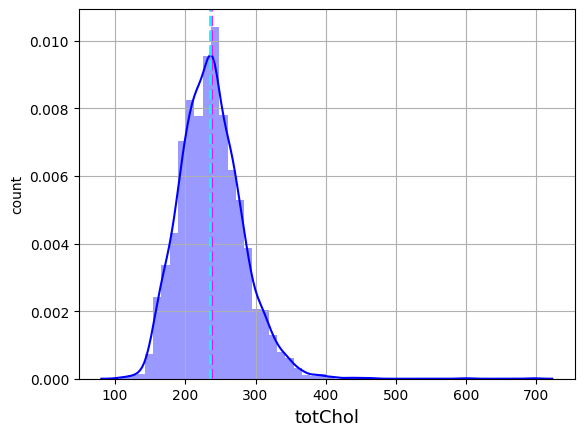

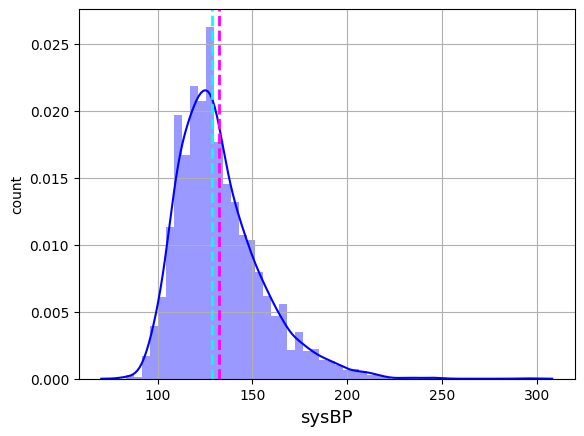

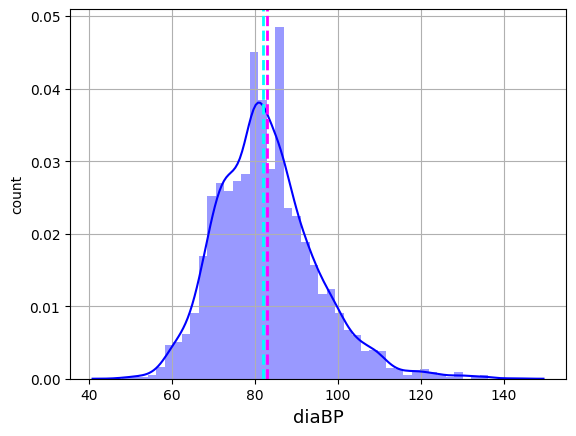

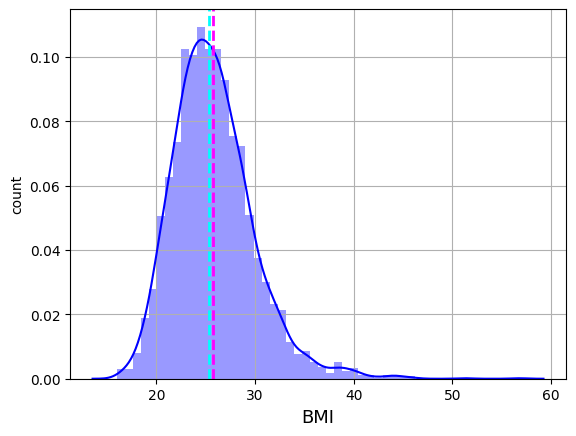

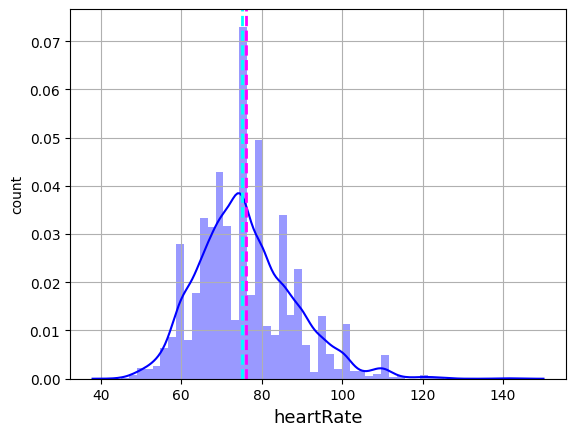

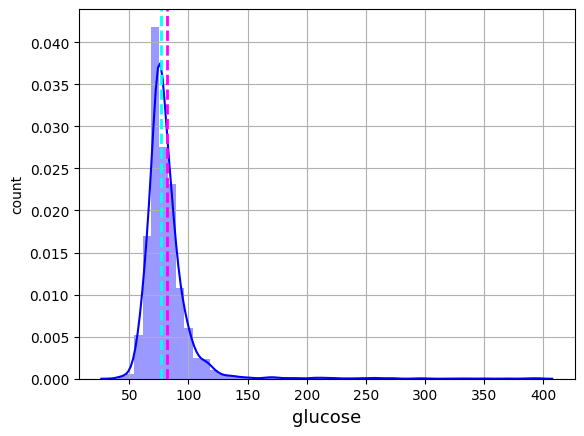

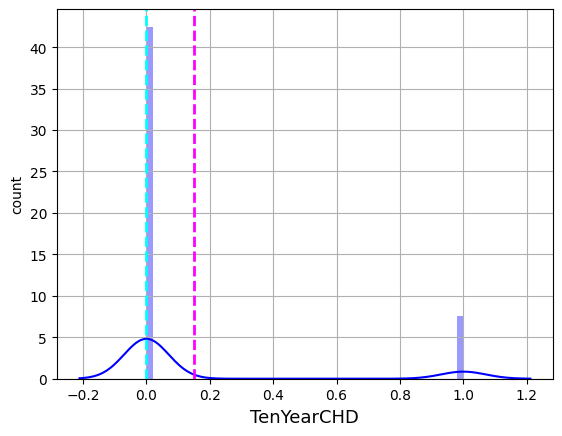

In [ ]:
# checking distribution for numerical features
for col in df.select_dtypes([int,float]).columns:

    sns.distplot(df[col], color='blue')

   #PLotting the mean and median
    plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('count')
    plt.grid()
    plt.show()

##### 1. Why did you pick the specific chart?

The choice of using a distribution plot (distplot) seems appropriate for visualizing the distribution of continuous numerical data, and here's why it might be a good choice

##### 2. What is/are the insight(s) found from the chart?

From the distribution we see that most of the columns are normally distributed, some of them are skewed and we can see some of the categorical columns also. In the box plot, we see some outliers also which we will handle later before model building.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

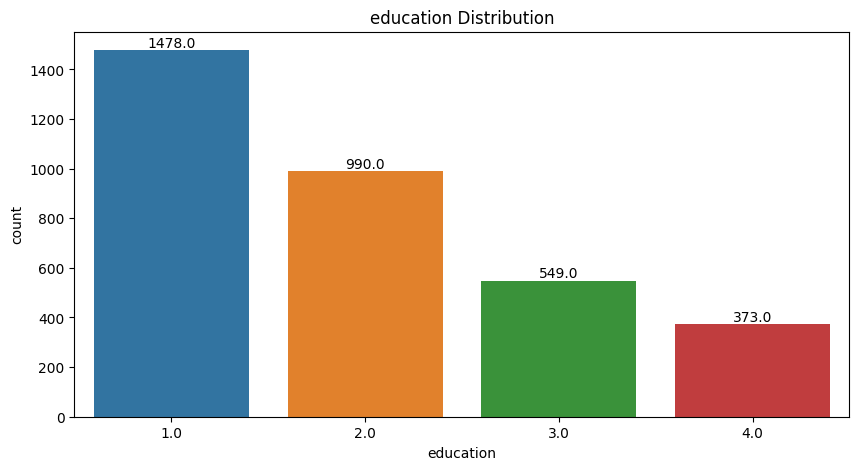

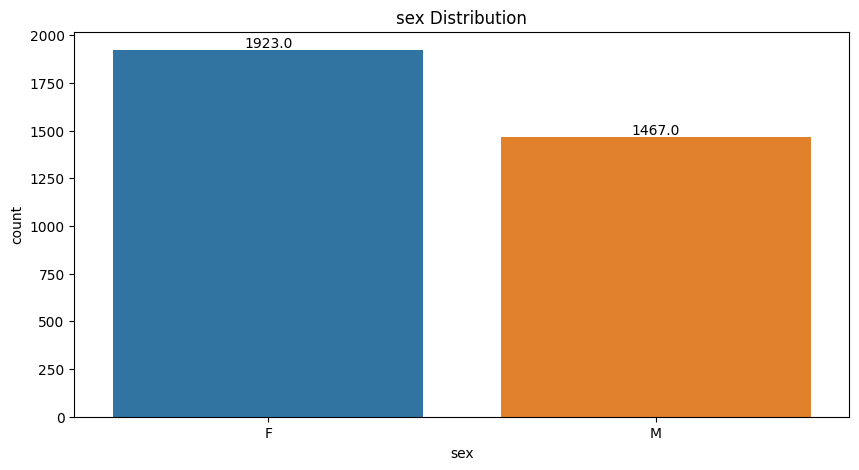

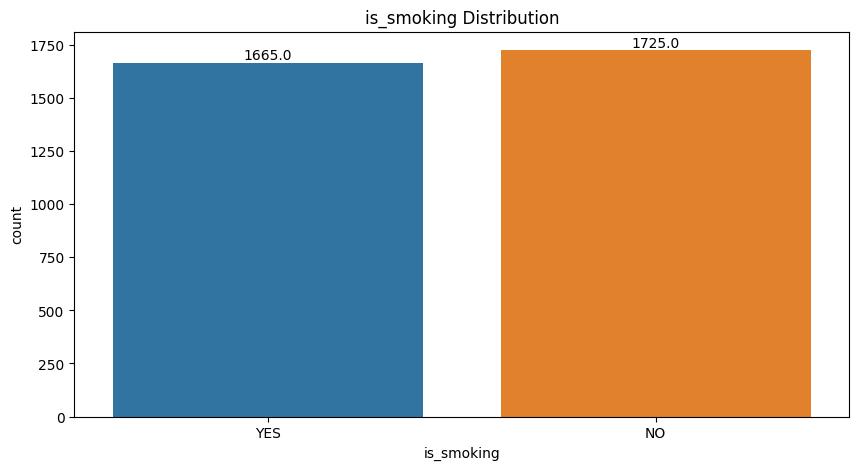

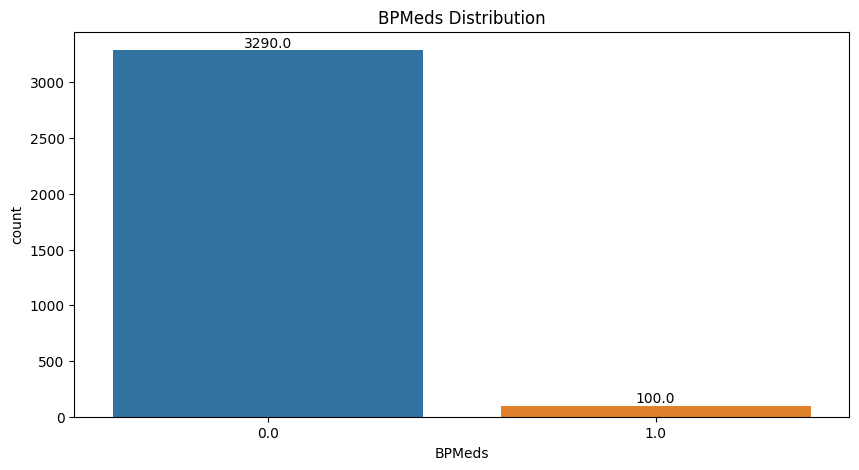

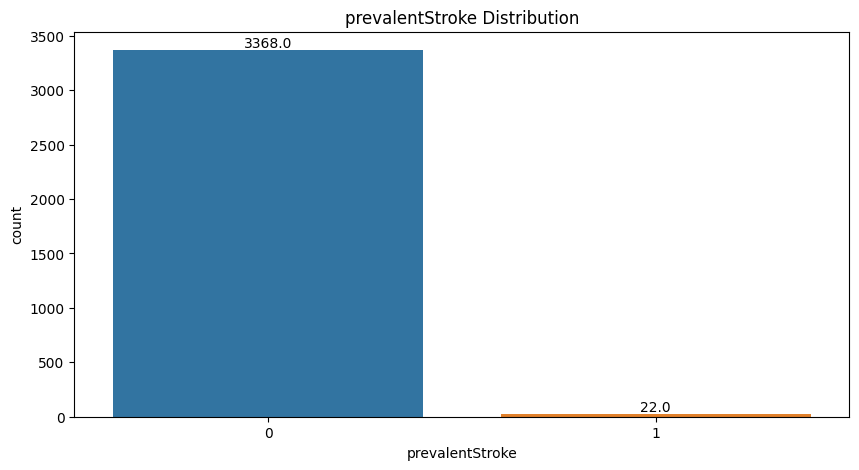

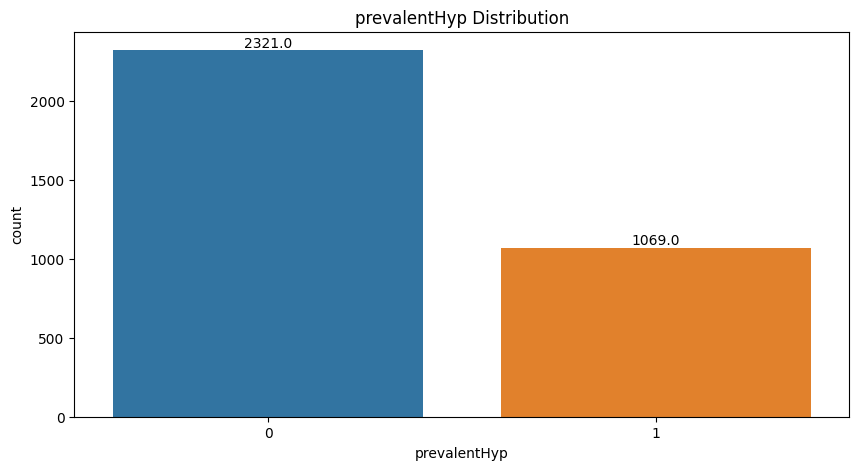

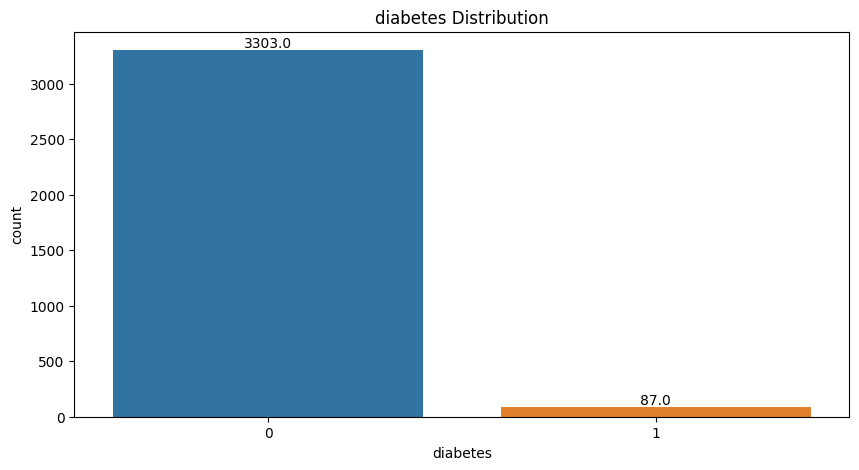

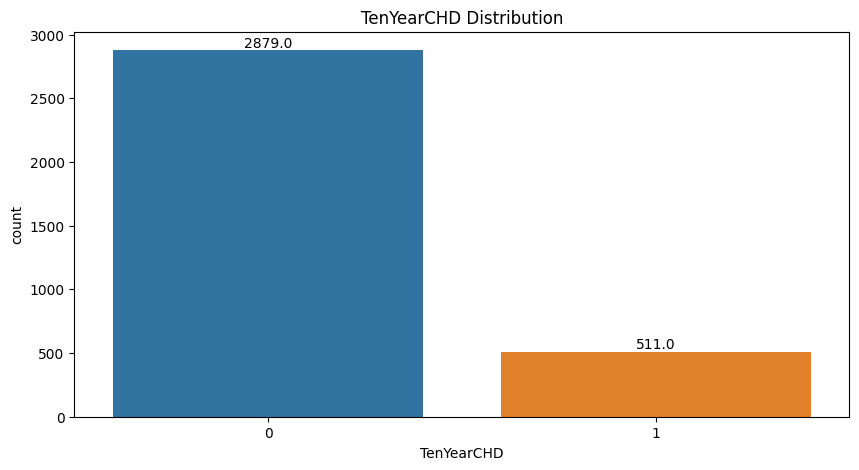

In [ ]:
# Loop through each categorical variable
for var in categorical_var:
    plt.figure(figsize=(10, 5))

    # Create a count plot
    p = sns.countplot(x=var, data=df)

    plt.xlabel(var)
    plt.title(f'{var} Distribution')

    # Annotate the count above each bar
    for patch in p.patches:
        plt.text(patch.get_x() + patch.get_width() / 2., patch.get_height(), str(patch.get_height()), ha='center', va='bottom')

    plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

The distribution of different categories in the categorical columns can be seen. The education column has the highest for the 1 category followed by 2 3 and 4.

The gender distribution is not even with high count for females. The is_smoking column is even. Bp_meds, prevalent_stroke, prevalent_hyp and diabetes are imbalanced, they have very few counts for the positive cases.

Finaly the ten_year_chd is also imbalanced with few positive cases compared to the negative cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution of categories in various columns helps identify patterns and target specific demographics or areas of focus. For example, businesses can develop tailored marketing campaigns based on the gender distribution or design educational programs based on the education levels of the target audience. Additionally, recognizing the imbalanced distribution of health conditions can guide businesses in developing specialized treatments or preventive measures to address specific needs.

However, it is important to note that the chart alone does not provide a complete picture of the business impact. The actual impact would depend on how well these insights are utilized in business strategies and actions. Factors such as market demand, competition, and the effectiveness of the implemented strategies would also play a role in determining the overall business growth. Therefore, while the gained insights have the potential to create positive business impact, their actual realization would require further analysis and strategic implementation.

#### Chart - 4

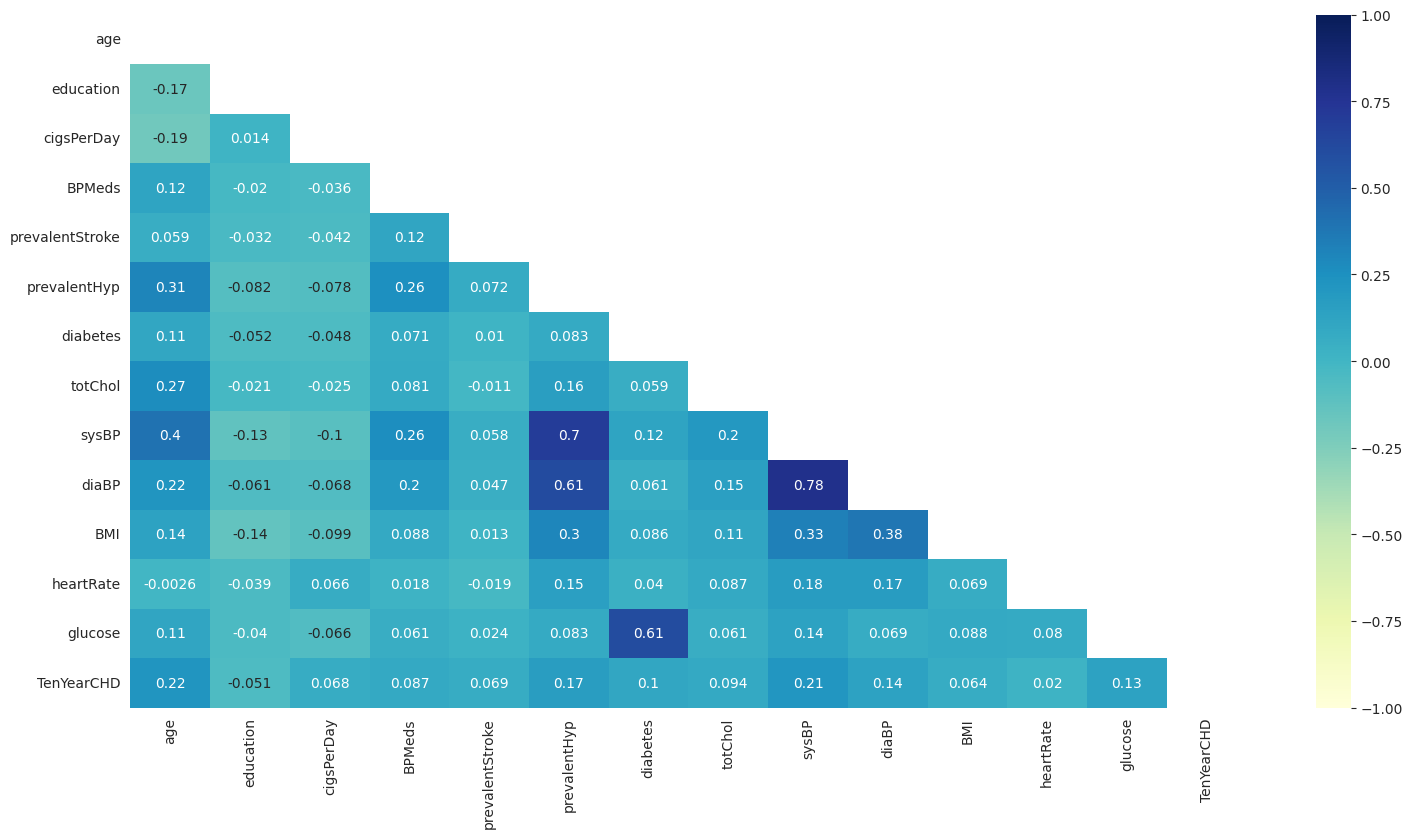

In [ ]:
# Correlation Heatmap visualization code
corr = df.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Here we see that the systolic_bp and diastolic_bp are highly correlated, also diabetes and glucose have a correlation of 0.62. Education is not importand as the CHD will not be acquired based on education level of a person so we can drop education column.

#### Chart - 5

In [ ]:
# Creating a list for different column types
categorical_columns = ['sex','is_smoking','education','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']
numerical_columns = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

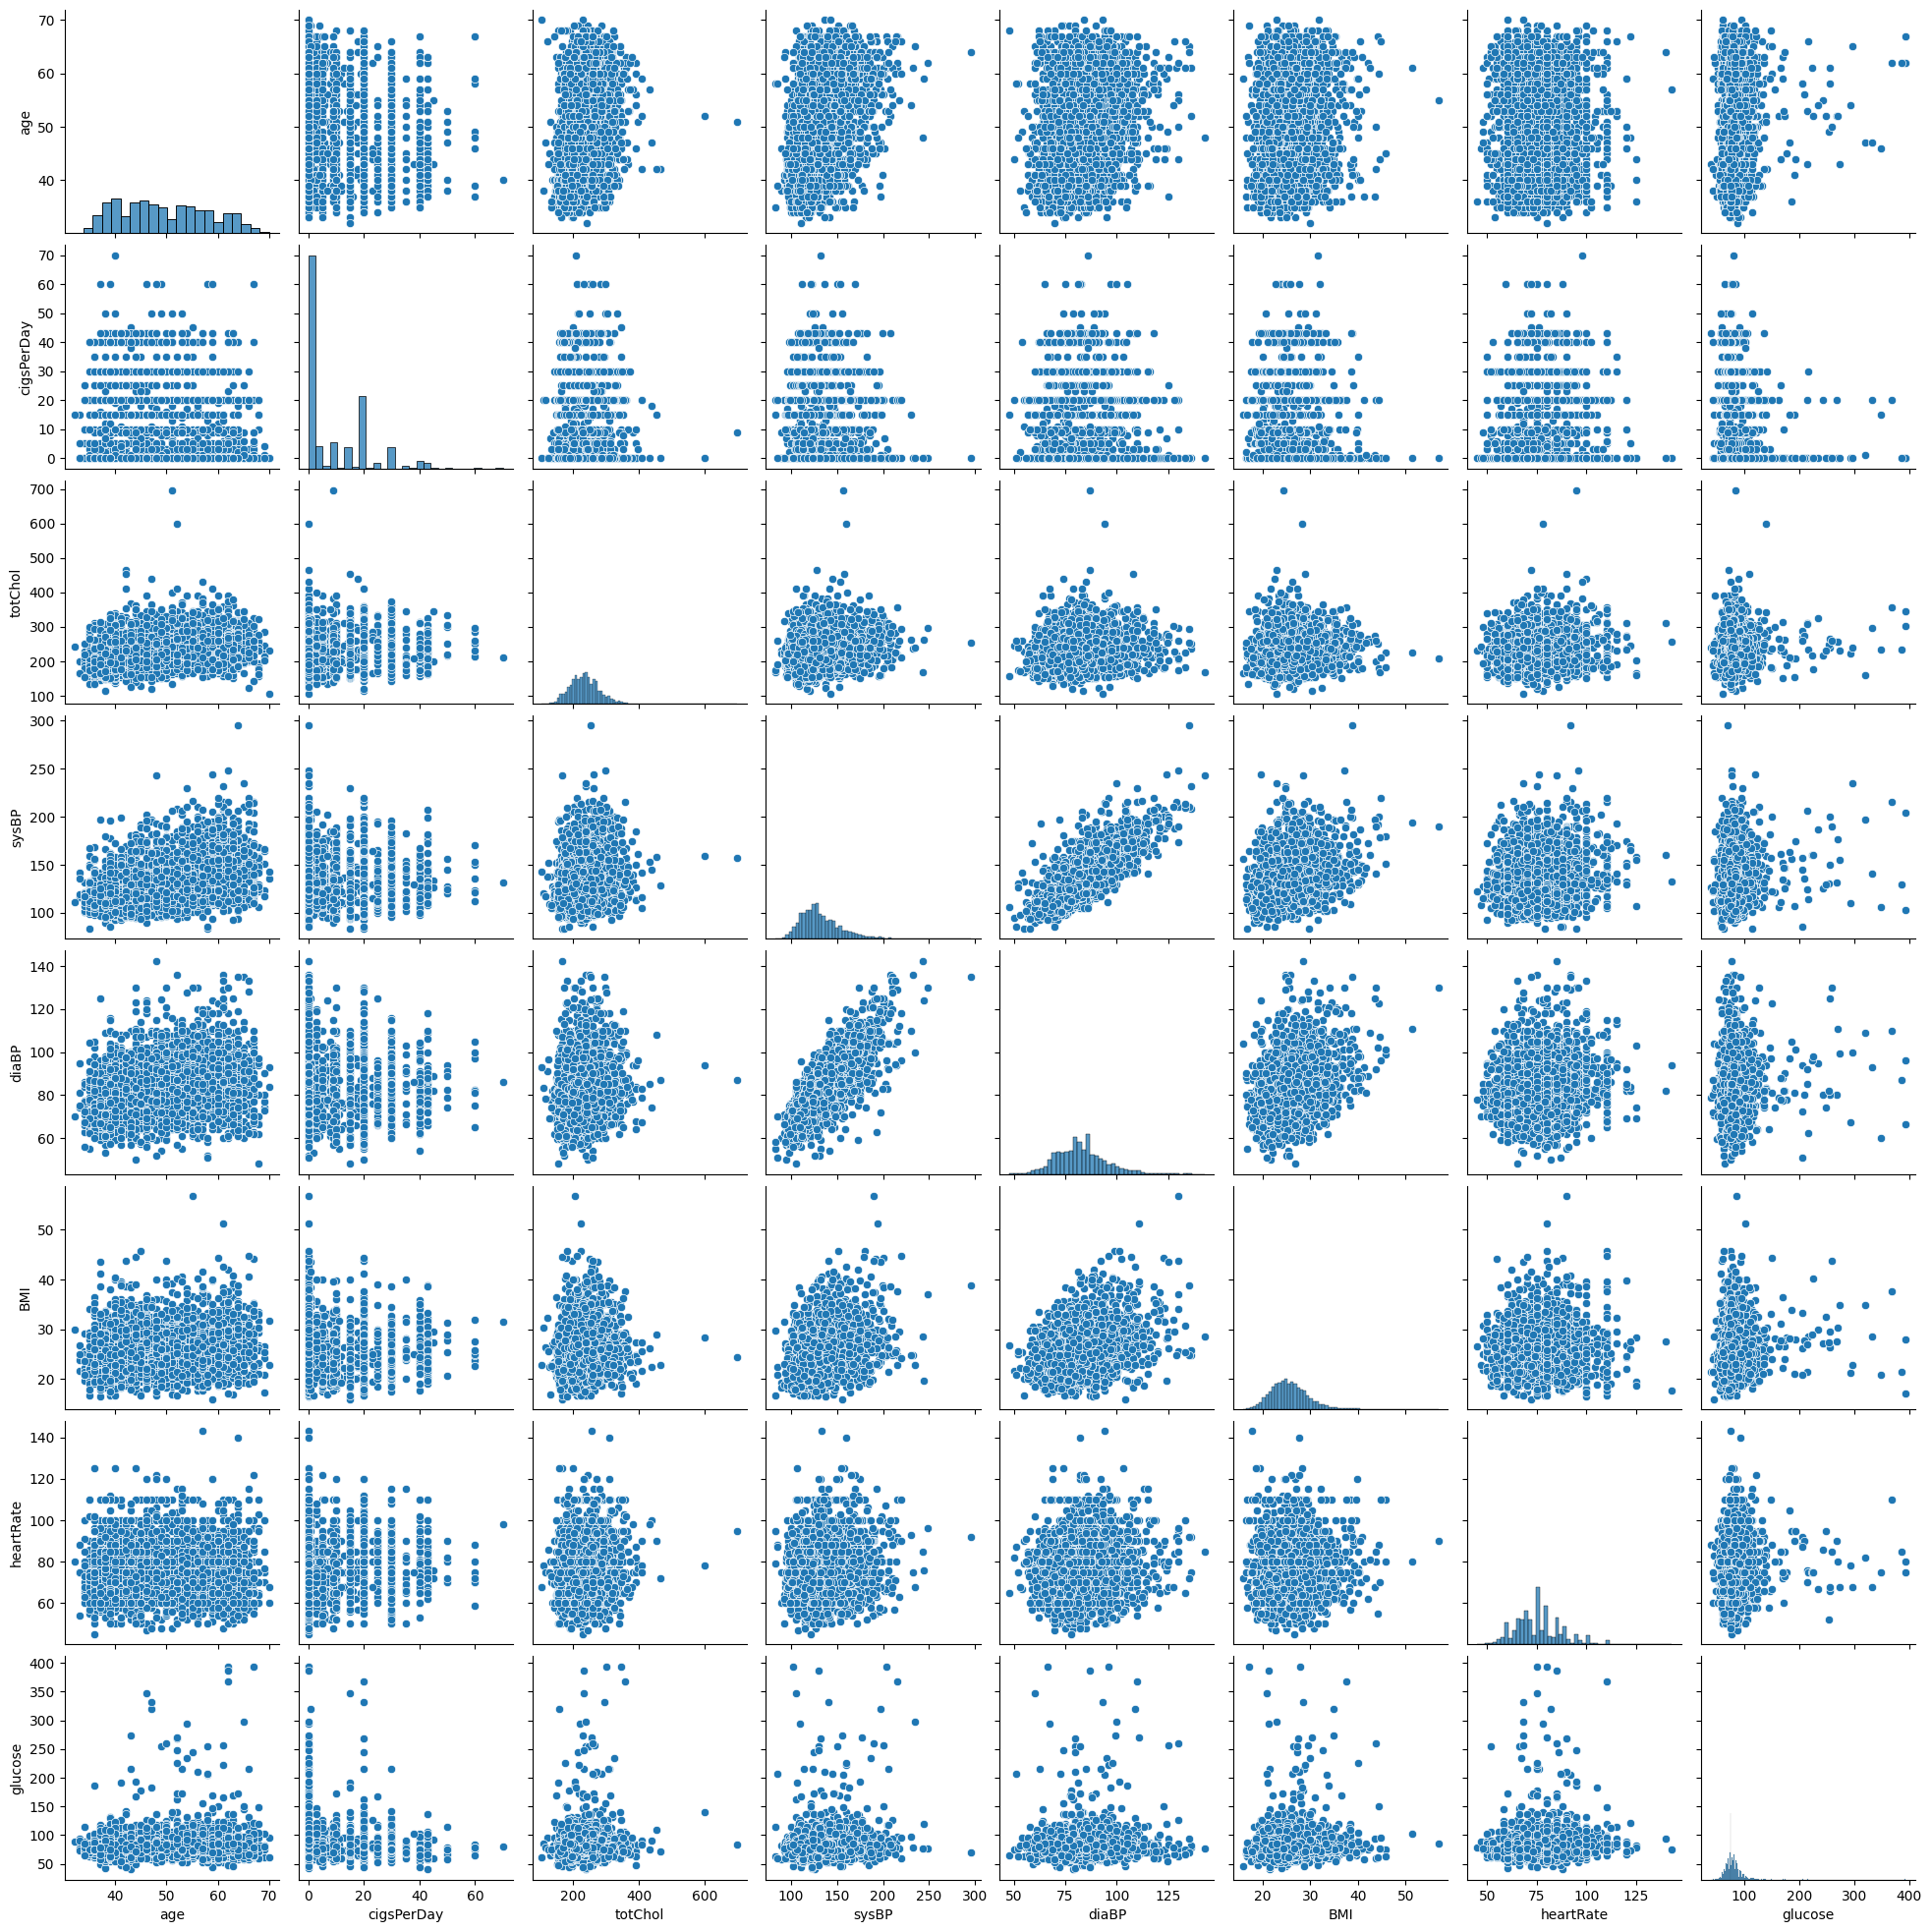

In [ ]:
sns.pairplot(df[numerical_columns])
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen, a pairplot, is suitable for visually exploring relationships between pairs of numerical variables in the dataset. It provides scatter plots of variables against each other along with histograms on the diagonal, enabling quick assessment of correlations and distributions.

##### 2. What is/are the insight(s) found from the chart?

Insights from the pairplot can include identifying linear relationships, clusters, and potential outliers among numerical variables. Scatter plots offer insights into how variables might change together, while histograms provide information about individual variable distributions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights could potentially contribute to a positive business impact by revealing patterns that may guide decision-making. For instance, if a strong positive correlation is observed between education level and income, businesses could tailor marketing strategies based on customer education levels. However, potential negative impacts might arise if negative correlations, such as higher education levels being associated with lower heart rates, require careful consideration. These insights could lead to tailored interventions, but any potential negative effects should be carefully managed to prevent unintended consequences.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing

--> Let's define three hypothetical statements and then perform hypothesis testing for each one using the dataset. For the sake of this example, let's assume a significance level (alpha) of 0.05 for all tests.



*   Statement 1: Comparing Heart Rates (Investigating whether there's a gender-based difference in heart rates).

*   Statement 2: Comparing Cholesterol Levels (Examining if cholesterol levels vary significantly between individuals with and without diabetes).

*   Statement 3: Testing for Association (Chi-Square Test)(Testing for an association between gender and smoking habits).

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement 1: Comparing Heart Rates (Investigating whether there's a gender-based difference in heart rates).

Null Hypothesis (H0): There is no significant difference in heart rates between males and females.

Alternative Hypothesis (H1): There is a significant difference in heart rates between males and females.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Separate heart rates for males and females
male_heart_rates = df[df['sex'] == 'M']['heartRate']
female_heart_rates = df[df['sex'] == 'F']['heartRate']

# Perform t-test
t_stat, p_value = ttest_ind(male_heart_rates, female_heart_rates)
alpha = 0.05
if p_value < alpha:
    result = "reject the null hypothesis"
else:
    result = "fail to reject the null hypothesis"

print(f"p-value: {p_value}")
print(f"We {result}.")

p-value: 4.104388350873805e-12
We reject the null hypothesis.


***Conclusion*** : There is a significant difference in heart rates between males and females.

##### Which statistical test have you done to obtain P-Value?

For statement 1, A two-sample independent t-test was employed to derive the p-value, selected for comparing mean heart rates between genders due to their independent categorization. The t-statistic and resulting p-value offer insight into potential significant distinctions in heart rates between male and female groups. Through comparison with a predetermined significance level (alpha = 0.05), the decision to accept or reject the null hypothesis is informed, revealing the potential existence of a meaningful divergence in heart rates based on gender.

##### Why did you choose the specific statistical test?

The two-sample independent t-test was chosen because it is well-suited for comparing the means of two distinct groups, such as male and female heart rates. As the groups are independent, this test is appropriate for identifying potential differences. The t-statistic and resulting p-value provide insight into whether a significant difference exists in heart rates between genders. By comparing the p-value to a significance level (alpha = 0.05), a decision is reached about rejecting or failing to reject the null hypothesis, revealing the presence or absence of a significant heart rate disparity based on gender.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement 2: Comparing Cholesterol Levels (Examining if cholesterol levels vary significantly between individuals with and without diabetes).

Null Hypothesis (H0): The average cholesterol level is the same for individuals with and without diabetes.

Alternative Hypothesis (H1): The average cholesterol level is different for individuals with and without diabetes.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Separate cholesterol levels for individuals with and without diabetes
diabetes_chol = df[df['diabetes'] == 1]['totChol']
no_diabetes_chol = df[df['diabetes'] == 0]['totChol']

# Perform t-test
t_stat, p_value = ttest_ind(diabetes_chol, no_diabetes_chol)
alpha = 0.05
if p_value < alpha:
    result = "reject the null hypothesis"
else:
    result = "fail to reject the null hypothesis"

print(f"p-value: {p_value}")
print(f"We {result}.")

p-value: 0.0005944844596394084
We reject the null hypothesis.


***Conclusion*** : There is a significant difference in cholesterol levels between individuals with and without diabetes.

##### Which statistical test have you done to obtain P-Value?

For statement 2, cholesterol levels were categorized by diabetes status, forming two groups: individuals with and without diabetes. Utilizing a t-test, the average cholesterol levels were contrasted between these groups. The derived p-value was then matched against a significance level (alpha = 0.05) to decide whether to accept or reject the null hypothesis. This methodology aids in ascertaining the presence of a noteworthy discrepancy in cholesterol levels, contingent on diabetes status.

##### Why did you choose the specific statistical test?

The t-test was chosen for its suitability in evaluating mean cholesterol differences between individuals with and without diabetes, involving independent groups and continuous data. Through t-statistic computation and p-value determination, this test facilitates the identification of significant cholesterol level disparities based on diabetes status. Guided by a chosen significance level (alpha = 0.05), the decision to accept or reject the null hypothesis is informed by the p-value, thus aiding in discerning the existence of meaningful divergence in cholesterol levels between the groups.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement 3: Testing for Association (Chi-Square Test)(Testing for an association between gender and smoking habits).

Null Hypothesis (H0): There is no association between gender and smoking habits.

Alternative Hypothesis (H1): There is an association between gender and smoking habits.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['is_smoking'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05
if p_value < alpha:
    result = "reject the null hypothesis"
else:
    result = "fail to reject the null hypothesis"

print(f"p-value: {p_value}")
print(f"We {result}.")

p-value: 5.409863929935563e-35
We reject the null hypothesis.


***Conclusion*** : There is an association between gender and smoking habits.

##### Which statistical test have you done to obtain P-Value?

For statement 3,The chi-square test of independence was used to assess if a significant association exists between gender and smoking habits. A contingency table, summarizing gender against smoking status, was analyzed. The resulting p-value was compared with a significance level (alpha = 0.05) to determine if there's enough evidence to reject the null hypothesis, implying a possible link between gender and smoking, or if the null hypothesis cannot be rejected, suggesting no substantial association.

##### Why did you choose the specific statistical test?

The chi-square test was chosen due to the categorical nature of gender and smoking status variables. Being nominal, the test of independence is ideal for assessing if these variables are independent or associated. Through comparison of observed and expected frequencies in a contingency table, the test gauges the presence of a significant relationship. This makes it apt for exploring potential links between gender and smoking behavior in this specific scenario.

## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

In [ ]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(df):
    for col in df[numeric_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

In [ ]:
# using the function to treat outliers
df = clip_outliers(df)

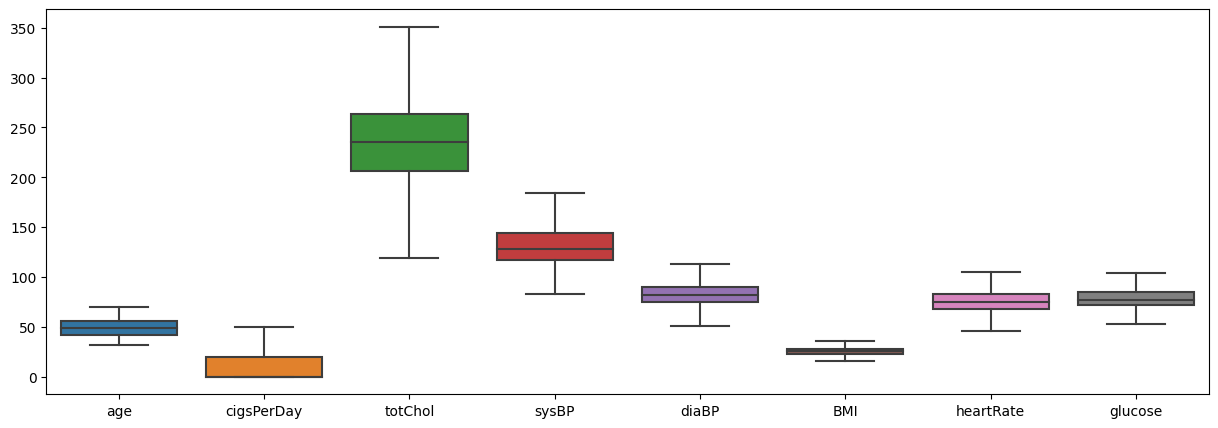

In [ ]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,5))
# boxplot of numerical features
sns.boxplot(data=df[numeric_features])
plt.show()

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
numeric_features

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

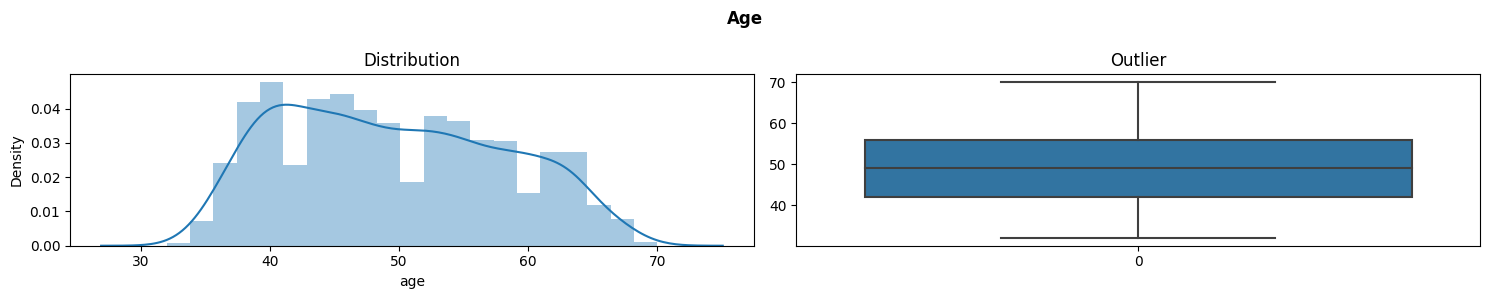

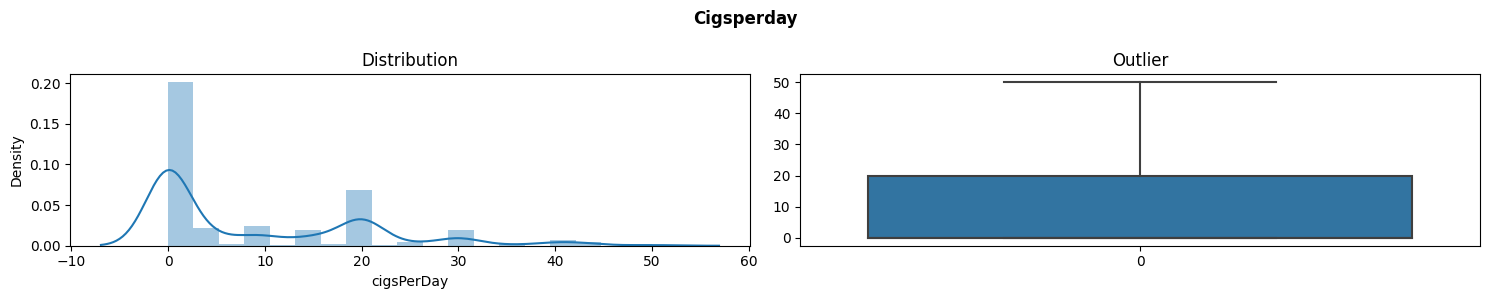

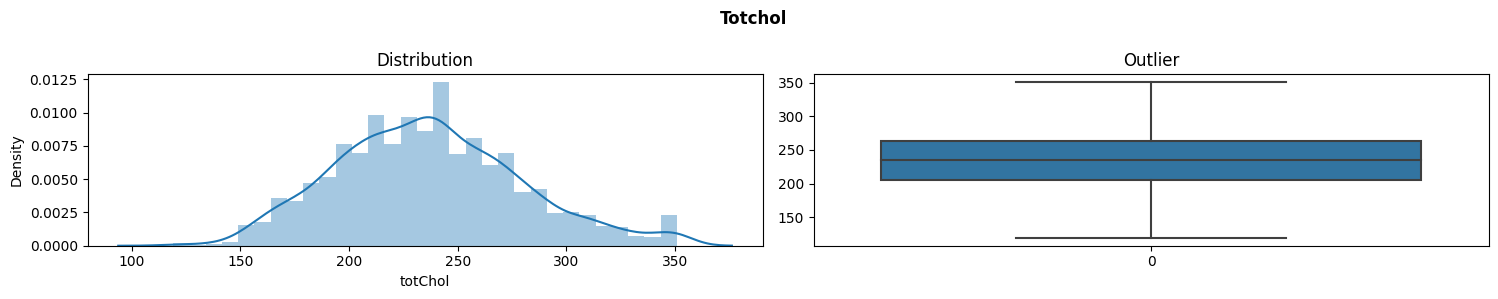

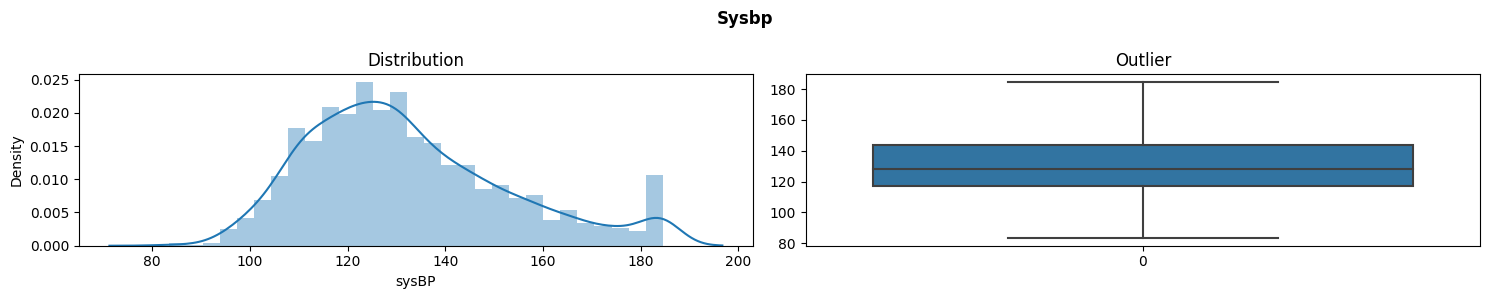

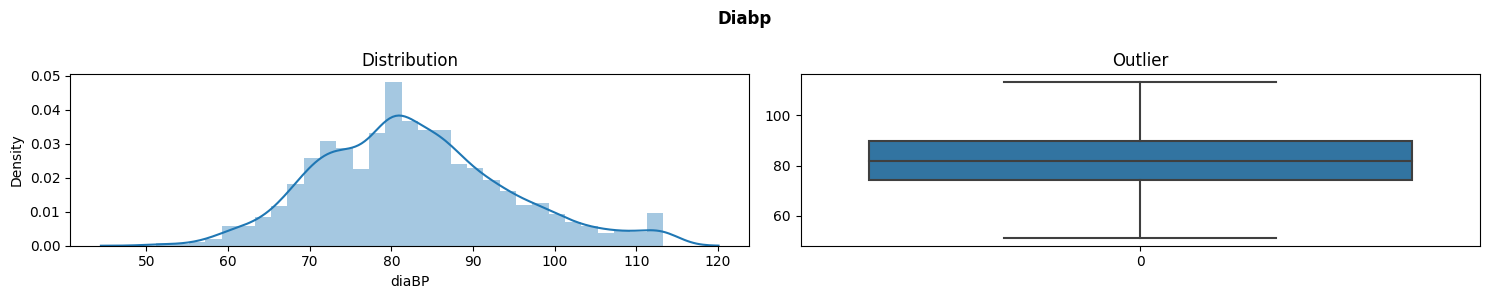

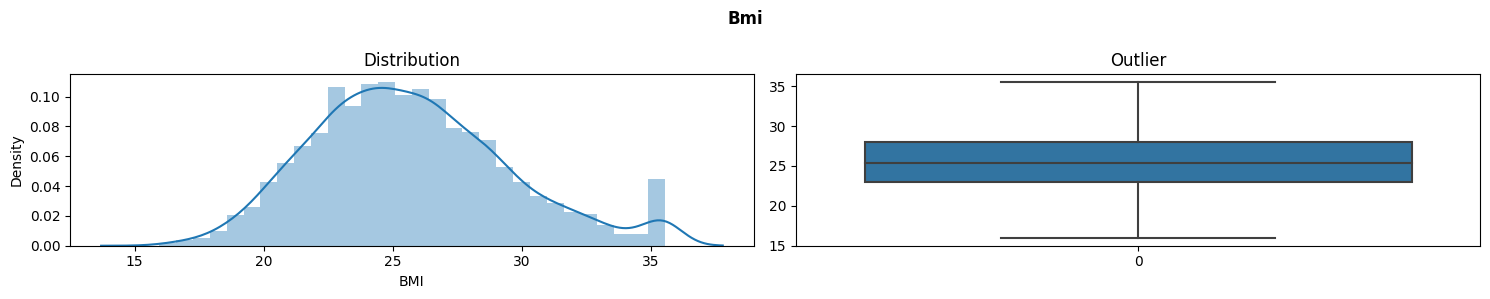

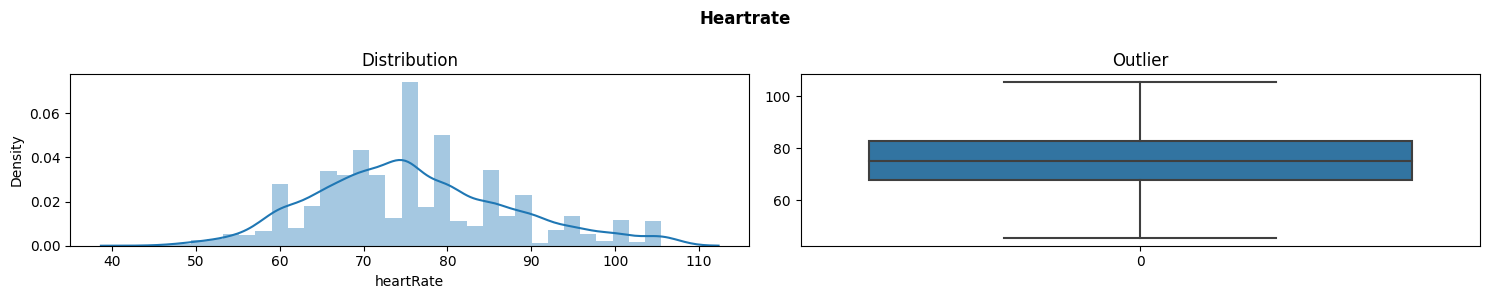

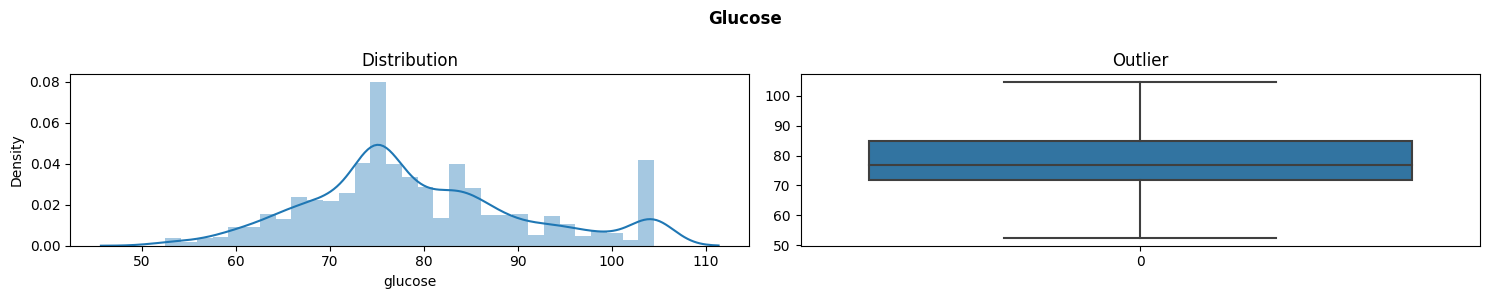

In [ ]:
# checking for distribution after treating outliers.
for col in numeric_features:
    fig, ax =plt.subplots(1,2, figsize=(15,3))
    sns.distplot(df[col], ax=ax[0]).set(title="Distribution")
    sns.boxplot(df[col], ax=ax[1]).set(title="Outlier")
    plt.suptitle(f'{col.title()}',weight='bold')
    plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

The above dataframe explains the effect of removal of outliers. If the outliers in this particular case are removed, it would cause removal of many rows with possible risk of CHD.

In this scenario, it is known that people with extreme values of Cholestrol, BP, Glucose, BMI etc. are prone to heart diseases. Hence, removal of higher numbers is not considered.

### 3. Categorical Encoding

In [ ]:
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  22.91       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
# Encode your categorical columns
df = pd.get_dummies(df, columns=['education'])

In [ ]:
# Encode your categorical columns
df = pd.get_dummies(df, columns=['sex'])

In [ ]:
df = df.drop(columns=['sex_F'],axis=1)
df = df.rename(columns={'sex_M':'sex'})
df.head()

age is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   64        YES         3.0     0.0                0             0   
1   36         NO         0.0     0.0                0             1   
2   46        YES        10.0     0.0                0             0   
3   50        YES        20.0     0.0                0             1   
4   64        YES        30.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  \
0         0    221.0  148.0   85.0  22.91       90.0     80.0           1   
1         0    212.0  168.0   98.0  29.77       72.0     75.0           0   
2         0    250.0  116.0   71.0  20.35       88.0     94.0           0   
3         0    233.0  158.0   88.0  28.26       68.0     94.0           1   
4         0    241.0  136.5   85.0  26.42       70.0     77.0           0   

   education_1.0  education_2.0  education_3.0  education_4.0  sex  
0              0              1              0              0    0  
1              0              0              0              1    1  
2              1              0              0              0    0  
3              1              0              0              0    1  
4              1              0              0              0    0

In [ ]:
# Adding pulse pressure as a column
df['pulsePressure'] = df['sysBP'] - df['diaBP']

On researching more on heart diseases, we have found that pulse pressure, which is the difference between systolic and diastolic BP has a large impact on CHD. Hence we can add PP (pulse pressure) which will carry values of both systolic and diastolic BP in one column.

As we consider the difference in systolic and diastolic BP to calculate pulse pressure, we can now drop the systolic and diastolic BP columns.

In [ ]:
# Dropping the systolic and diastolic BP columns
df.drop(['sysBP','diaBP'], axis = 1, inplace = True)

#### We can also drop the 'is_smoking' column, if cigarettes per day is more than 0 then the is_smoking column is 1 (YES). Hence, they both have the same meaning.

In [ ]:
# Dropping the 'is_smoking' column
df.drop('is_smoking', axis = 1, inplace = True)

In [ ]:
df = df[['age', 'education_1.0','education_2.0','education_3.0', 'education_4.0', 'sex', 'cigsPerDay','pulsePressure', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]

In [ ]:
df.head(2)

age  education_1.0  education_2.0  education_3.0  education_4.0  sex  \
0   64              0              1              0              0    0   
1   36              0              0              0              1    1   

   cigsPerDay  pulsePressure  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0         3.0           63.0     0.0                0             0         0   
1         0.0           70.0     0.0                0             1         0   

   totChol    BMI  heartRate  glucose  TenYearCHD  
0    221.0  22.91       90.0     80.0           1  
1    212.0  29.77       72.0     75.0           0

### 4. Feature Manipulation & Selection

#### Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Detecting the multicollinearity using VIF Values.
# Calculating VIF(Variance Inflation Factor) to see the correlation between independent variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
cal_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD']]])

variables        VIF
0               age   1.429070
1     education_1.0  80.912485
2     education_2.0  52.003135
3     education_3.0  29.188774
4     education_4.0  20.086292
5               sex   1.226495
6        cigsPerDay   1.217882
7     pulsePressure   1.694427
8            BPMeds   1.098129
9   prevalentStroke   1.020768
10     prevalentHyp   1.631427
11         diabetes   1.091947
12          totChol   1.123206
13              BMI   1.170636
14        heartRate   1.080353
15          glucose   1.104650

#### As we can see above some features are having high correlation but this features are very important for predicting TenYearCHD. Hence we cannot remove these features.

### 8. Handling Imbalanced Dataset

In [ ]:
df.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

It looks like we are dealing with an imbalanced dataset in the 'TenYearCHD' column, where one class has significantly more samples than the other. In this case, there are 2879 samples with the value 0 and 511 samples with the value 1.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Creating an instance for SMOTE
oversample = SMOTE(random_state=42)

In [ ]:
df.head()

age  education_1.0  education_2.0  education_3.0  education_4.0  sex  \
0   64              0              1              0              0    0   
1   36              0              0              0              1    1   
2   46              1              0              0              0    0   
3   50              1              0              0              0    1   
4   64              1              0              0              0    0   

   cigsPerDay  pulsePressure  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0         3.0           63.0     0.0                0             0         0   
1         0.0           70.0     0.0                0             1         0   
2        10.0           45.0     0.0                0             0         0   
3        20.0           70.0     0.0                0             1         0   
4        30.0           51.5     0.0                0             0         0   

   totChol    BMI  heartRate  glucose  TenYearCHD  
0    221.0  22.91       90.0     80.0           1  
1    212.0  29.77       72.0     75.0           0  
2    250.0  20.35       88.0     94.0           0  
3    233.0  28.26       68.0     94.0           1  
4    241.0  26.42       70.0     77.0           0

In [ ]:
X = df.drop(columns='TenYearCHD')     # independent features
y = df['TenYearCHD']                  # dependent features

In [ ]:
# The rows and columns of X and y
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns before oversampling')
print(f'y has {y.shape[0]} rows before oversampling')

X has 3390 rows and 16 columns before oversampling
y has 3390 rows before oversampling


In [ ]:
# Using SMOTE to oversample
X,y = oversample.fit_resample(X,y)

In [ ]:
# Counts of each classes after oversampling
y.value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

In [ ]:
# Rows in the dataset after oversampling
print(f'Number of rows after oversampling in X is {len(X)}')
print(f'Number of rows after oversampling in y is {len(y)}')

Number of rows after oversampling in X is 5758
Number of rows after oversampling in y is 5758


Now both the classes are of equal size and the predictions will not be biased.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE is chosen to handle the imbalanced dataset because it addresses the class imbalance issue by creating synthetic samples, which helps in achieving a more balanced class distribution. This approach avoids the drawbacks of undersampling (removing instances from the majority class) and provides more data for the minority class without introducing bias by simply duplicating existing instances.n.

### 6. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4606, 16)
(1152, 16)
(4606,)
(1152,)


### 7. Data Scaling

In [ ]:
# Scaling your data
# The numbers in the data have different ranges, hence, we will scale the data using the Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

#### 88. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not needed. We have already reduced the number of features and only the important features are left.

## ***7. ML Model Implementation***

In [ ]:
def predict(ml_model, model_name):

    '''
    Pass the model and predict value.
    Function will calculate all the eveluation metrics and appending those metrics score on model_result table.
    Plotting confusion_matrix and roc_curve for test data.
    '''

    # model fitting
    model = ml_model.fit(X_train, y_train)

    # predicting value and probability
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_prob = model.predict_proba(X_train)[:,1]
    y_test_prob = model.predict_proba(X_test)[:,1]


    ''' Performance Metrics '''
    # accuracy score  ---->  (TP+TN)/(TP+FP+TN+FN)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'train accuracy : {round(train_accuracy,3)}')
    print(f'test accuracy : {round(test_accuracy,3)}')

    # precision score  ---->  TP/(TP+FP)
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    print(f'train precision : {round(train_precision,3)}')
    print(f'test precision : {round(test_precision,3)}')

    # recall score  ---->  TP/(TP+FN)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    print(f'train recall : {round(train_recall,3)}')
    print(f'test recall : {round(test_recall,3)}')

    # f1 score  ---->  Harmonic Mean of Precision and Recall
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    print(f'train f1 : {round(train_f1,3)}')
    print(f'test f1 : {round(test_f1,3)}')

    # roc_auc score  ---->  It shows how well the model can differentiate between classes.
    train_roc_auc = roc_auc_score(y_train, y_train_prob)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)
    print(f'train roc_auc : {round(train_roc_auc,3)}')
    print(f'test roc_auc : {round(test_roc_auc,3)}')
    print('-'*80)

    # classification report
    print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
    print('-'*80)


    ''' plotting Confusion Matrix '''
    #ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
    #plt.title('confusion matrix on Test data', weight='bold')
    #plt.show()
    #print('-'*80)
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'], cmap="Greens", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'], cmap="Greens", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()



    ''' plotting ROC curve '''
    fpr_train,tpr_train,threshold_train = roc_curve(y_train, y_train_prob)
    fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_test_prob)
    #plt.plot(fpr,tpr, label=f'ROC - {model_name}')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(train_roc_auc))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(test_roc_auc))
    plt.plot([0,1], [0,1], '--')
    plt.title('ROC curve on Test data', weight='bold')
    plt.xlabel('False Positive Rate----->')
    plt.ylabel('True Positive Rate----->')
    plt.legend(loc=4)


    ''' actual value vs predicted value on test data
    d = {'y_actual':y_test, 'y_predict':y_test_pred}
    print(pd.DataFrame(data=d).head(10).T)                   # constructing a dataframe with both actual and predicted values
    print('-'*80)'''

    model_score = [model_name,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_roc_auc,test_roc_auc]
    return model_score

In [ ]:
score = pd.DataFrame(index =['model_name','train_accuracy','test_accuracy','train_precision','test_precision','train_recall','test_recall','train_f1','test_f1','train_roc_auc','test_roc_auc'],)

### ML Model - 1 : Logistic Regression

train accuracy : 0.788
test accuracy : 0.78
train precision : 0.845
test precision : 0.806
train recall : 0.711
test recall : 0.711
train f1 : 0.772
test f1 : 0.756
train roc_auc : 0.876
test roc_auc : 0.861
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       602
           1       0.81      0.71      0.76       550

    accuracy                           0.78      1152
   macro avg       0.78      0.78      0.78      1152
weighted avg       0.78      0.78      0.78      1152

--------------------------------------------------------------------------------

Confusion Matrix:


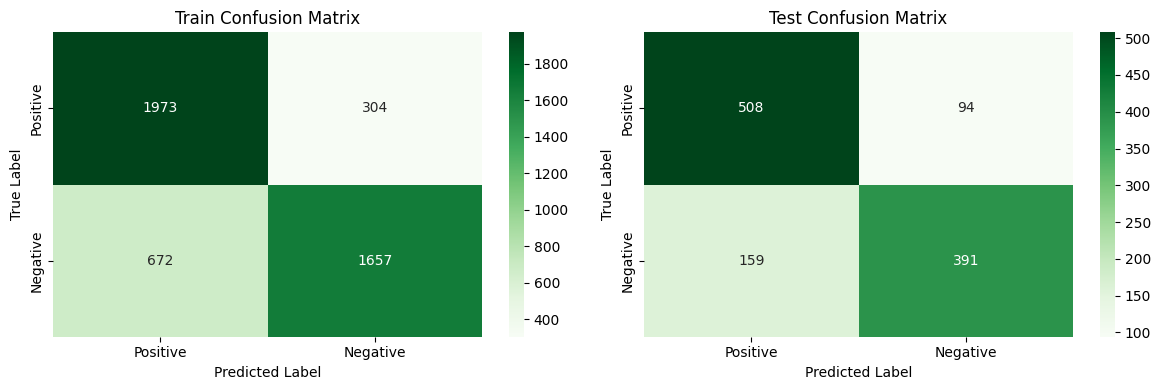

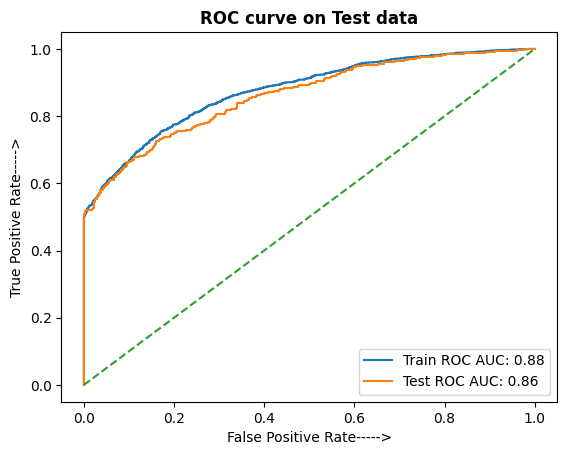

In [ ]:
# ML Model - 1 Implementation
lr = predict(LogisticRegression(), 'LogisticRegression')
# model is trained (fit ) and predicted in the evaluate model

#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.DataFrame

In [ ]:
score['Logistic regression'] = lr
score

Logistic regression
model_name       LogisticRegression
train_accuracy             0.788102
test_accuracy              0.780382
train_precision            0.844977
test_precision             0.806186
train_recall               0.711464
test_recall                0.710909
train_f1                   0.772494
test_f1                    0.755556
train_roc_auc              0.875508
test_roc_auc                0.86138

It appears that hyperparameter tuning did not improve the performance of the Logistic Regression model on the test set. The precision, recall, accuracy, ROC-AUC, and F1 scores on the test set are the same for both the untuned and tuned Logistic Regression models.

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* The model's accuracy on both training and test data is around 78%, indicating that it's able to correctly classify around 78% of the instances.

* Precision indicates the ability to correctly classify positive cases. The precision values on both training and test data are fairly high, showing that when the model predicts a positive case, it's often correct.

* Recall is also quite decent, indicating that the model captures a good portion of actual positive cases.

* F1-score is a balanced measure that considers both precision and recall. The values are moderate, suggesting a balance between precision and recall.

* ROC-AUC scores are relatively high, indicating that the model has a good ability to discriminate between the two classes.

### ML Model - 2 : Support Vector Machine (SVM)

train accuracy : 0.812
test accuracy : 0.813
train precision : 0.873
test precision : 0.851
train recall : 0.735
test recall : 0.738
train f1 : 0.798
test f1 : 0.791
train roc_auc : 0.9
test roc_auc : 0.878
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       602
           1       0.85      0.74      0.79       550

    accuracy                           0.81      1152
   macro avg       0.82      0.81      0.81      1152
weighted avg       0.82      0.81      0.81      1152

--------------------------------------------------------------------------------

Confusion Matrix:


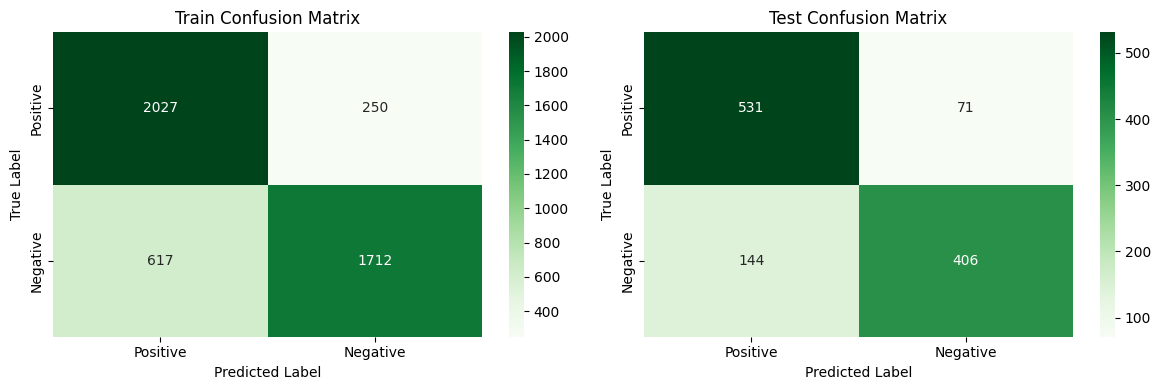

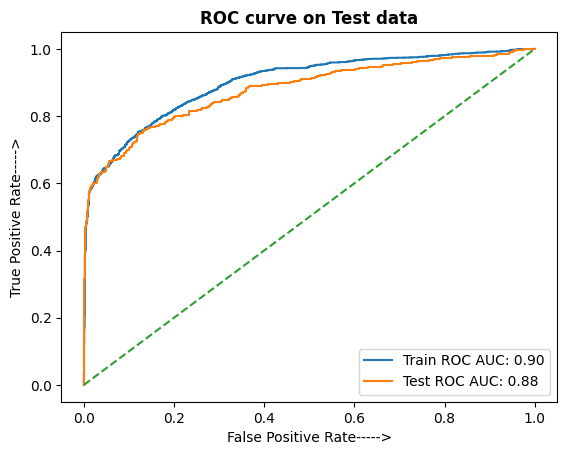

In [ ]:
svc = predict(SVC(probability=True), 'SVM')

In [ ]:
score['SVM'] = svc
score

Logistic regression       SVM
model_name       LogisticRegression       SVM
train_accuracy             0.788102  0.811767
test_accuracy              0.780382  0.813368
train_precision            0.844977  0.872579
test_precision             0.806186  0.851153
train_recall               0.711464  0.735079
test_recall                0.710909  0.738182
train_f1                   0.772494  0.797949
test_f1                    0.755556  0.790652
train_roc_auc              0.875508  0.900062
test_roc_auc                0.86138   0.87849

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 5  Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
svc = SVC(probability=True)
# set up the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']}
# perform a grid search with 5-fold cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# train the classifier with the best hyperparameters on the full training set
svc_best = SVC(**best_params, probability=True)
svc_best.fit(X_train, y_train)
# Predict on the model
y_test_svc_pred_gs = svc_best.predict(X_test)
y_train_svc_pred_gs = svc_best.predict(X_train)
y_score_svc_pred_gs = svc_best.predict_proba(X_test)[:, 1]

Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


train accuracy : 0.846
test accuracy : 0.819
train precision : 0.895
test precision : 0.846
train recall : 0.787
test recall : 0.76
train f1 : 0.838
test f1 : 0.801
train roc_auc : 0.925
test roc_auc : 0.887
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       602
           1       0.85      0.76      0.80       550

    accuracy                           0.82      1152
   macro avg       0.82      0.82      0.82      1152
weighted avg       0.82      0.82      0.82      1152

--------------------------------------------------------------------------------

Confusion Matrix:


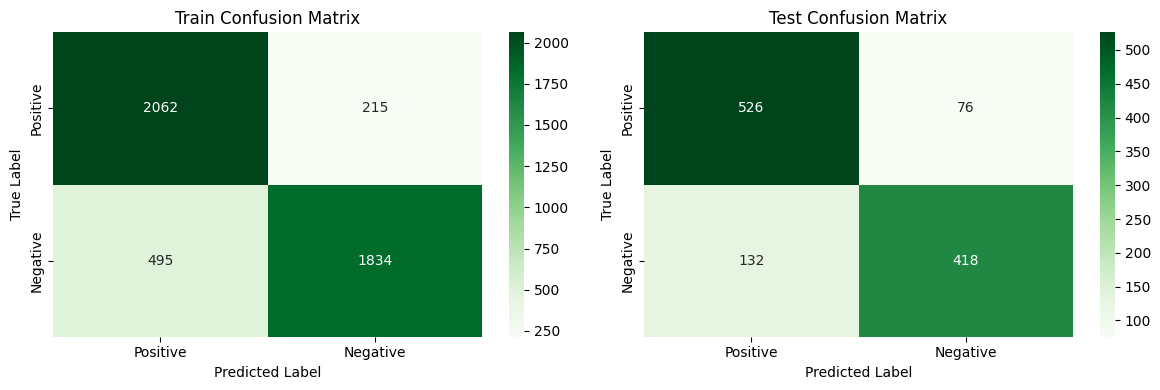

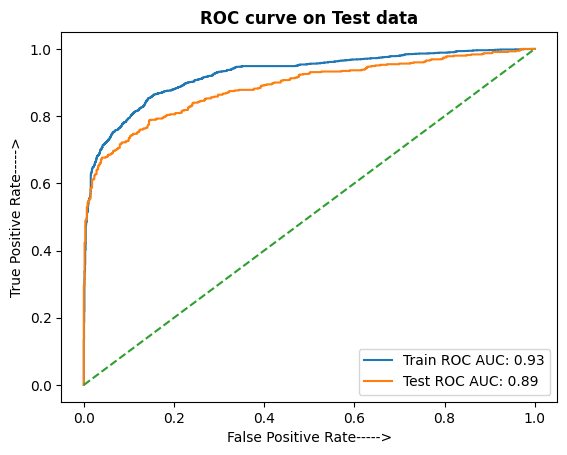

In [ ]:
svc_tuned = predict(SVC(probability=True,C=10, gamma='scale',kernel='rbf'), 'SVM_Tuned')

#### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score['SVM Tuned'] = svc_tuned
score

Logistic regression       SVM  SVM Tuned
model_name       LogisticRegression       SVM  SVM_Tuned
train_accuracy             0.788102  0.811767   0.845853
test_accuracy              0.780382  0.813368   0.819444
train_precision            0.844977  0.872579   0.895071
test_precision             0.806186  0.851153   0.846154
train_recall               0.711464  0.735079   0.787462
test_recall                0.710909  0.738182       0.76
train_f1                   0.772494  0.797949   0.837825
test_f1                    0.755556  0.790652   0.800766
train_roc_auc              0.875508  0.900062   0.925092
test_roc_auc                0.86138   0.87849   0.886999

#### Which hyperparameter optimization technique have you used and why?

It appears that hyperparameter tuning improved the performance of the SVM model on the test set. The tuned SVM model has higher recall, accuracy, and F1 score on the test set compared to the untuned SVM model. However, the precision and ROC-AUC scores on the test set decreased slightly after tuning.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* We got best parameters as 'C': 10, 'gamma': 'scale', 'kernel': 'rbf' after hyperparameter tuning.

* The accuracy of our model improved significantly from 81.33% to 82%. We also saw improvements in the Precision and Recall metrics to 92.69% and 85.61%, respectively. Additionally, the ROC AUC score improved to 0.8958, which is considered good.

### ML Model - 3 : KNN (K-Nearest Neighbours)

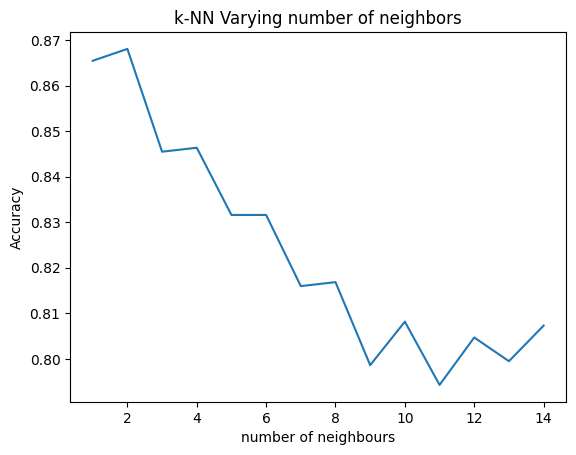

In [ ]:
# Checking the optimum value of the k:
accuracy=[]

# Iteratig for the optimum values of k
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(knn.score(X_test, y_test))

#plotting the k-value vs accuracy
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,15), accuracy)
plt.xlabel('number of neighbours')
plt.ylabel('Accuracy')
plt.show()

train accuracy : 1.0
test accuracy : 0.865
train precision : 1.0
test precision : 0.832
train recall : 1.0
test recall : 0.9
train f1 : 1.0
test f1 : 0.865
train roc_auc : 1.0
test roc_auc : 0.867
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.90      0.83      0.87       602
           1       0.83      0.90      0.86       550

    accuracy                           0.87      1152
   macro avg       0.87      0.87      0.87      1152
weighted avg       0.87      0.87      0.87      1152

--------------------------------------------------------------------------------

Confusion Matrix:


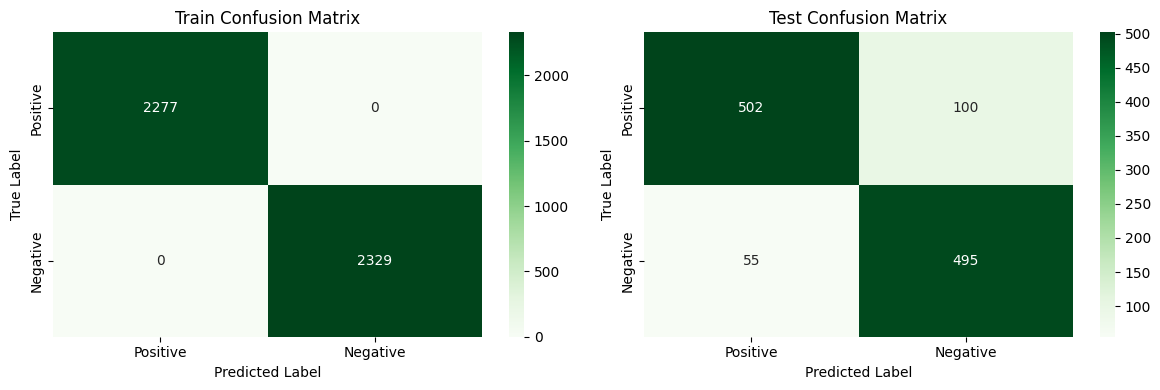

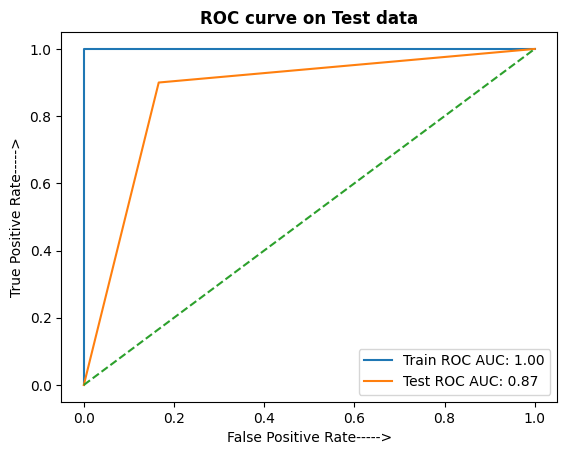

In [ ]:
knn = predict(KNeighborsClassifier(n_neighbors=1), 'KNN')

In [ ]:
score['KNN'] = knn
score

Logistic regression       SVM  SVM Tuned       KNN
model_name       LogisticRegression       SVM  SVM_Tuned       KNN
train_accuracy             0.788102  0.811767   0.845853       1.0
test_accuracy              0.780382  0.813368   0.819444  0.865451
train_precision            0.844977  0.872579   0.895071       1.0
test_precision             0.806186  0.851153   0.846154  0.831933
train_recall               0.711464  0.735079   0.787462       1.0
test_recall                0.710909  0.738182       0.76       0.9
train_f1                   0.772494  0.797949   0.837825       1.0
test_f1                    0.755556  0.790652   0.800766  0.864629
train_roc_auc              0.875508  0.900062   0.925092       1.0
test_roc_auc                0.86138   0.87849   0.886999  0.866944

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* The K-Nearest Neighbors (KNN) model demonstrates exceptional performance across various metrics, boasting perfect scores in training accuracy, precision, recall, F1-score, and ROC-AUC.
* However, this could indicate overfitting, as its test accuracy is slightly lower at 86.50%.
* The model excels in identifying positive instances, with high precision and recall scores, though the balance between these metrics might need refinement.
* While its training performance is impressive, its ability to generalize to new data warrants attention.
* Overall, KNN's potential is evident, but careful consideration and potential fine-tuning are needed to address overfitting and ensure reliable real-world applicability.

### ML Model - 4 : Decision Tree

train accuracy : 1.0
test accuracy : 0.815
train precision : 1.0
test precision : 0.783
train recall : 1.0
test recall : 0.847
train f1 : 1.0
test f1 : 0.814
train roc_auc : 1.0
test roc_auc : 0.816
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       602
           1       0.78      0.85      0.81       550

    accuracy                           0.82      1152
   macro avg       0.82      0.82      0.82      1152
weighted avg       0.82      0.82      0.82      1152

--------------------------------------------------------------------------------

Confusion Matrix:


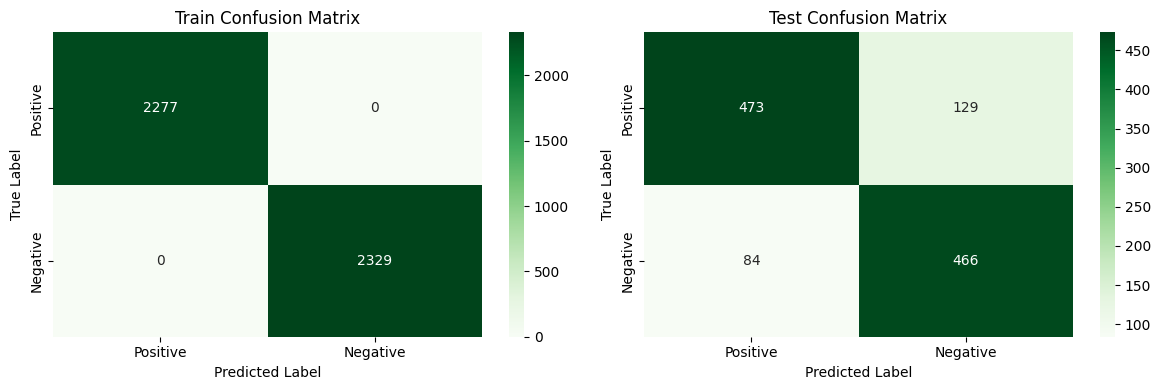

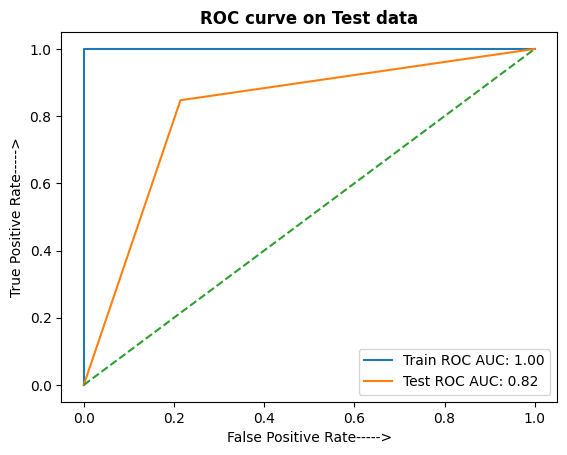

In [ ]:
dt = predict(DecisionTreeClassifier(), 'DecisionTree')

In [ ]:
score['Decision Tree'] = dt
score

Logistic regression       SVM  SVM Tuned       KNN  \
model_name       LogisticRegression       SVM  SVM_Tuned       KNN   
train_accuracy             0.788102  0.811767   0.845853       1.0   
test_accuracy              0.780382  0.813368   0.819444  0.865451   
train_precision            0.844977  0.872579   0.895071       1.0   
test_precision             0.806186  0.851153   0.846154  0.831933   
train_recall               0.711464  0.735079   0.787462       1.0   
test_recall                0.710909  0.738182       0.76       0.9   
train_f1                   0.772494  0.797949   0.837825       1.0   
test_f1                    0.755556  0.790652   0.800766  0.864629   
train_roc_auc              0.875508  0.900062   0.925092       1.0   
test_roc_auc                0.86138   0.87849   0.886999  0.866944   

                Decision Tree  
model_name       DecisionTree  
train_accuracy            1.0  
test_accuracy        0.815104  
train_precision           1.0  
test_precision       0.783193  
train_recall              1.0  
test_recall          0.847273  
train_f1                  1.0  
test_f1              0.813974  
train_roc_auc             1.0  
test_roc_auc         0.816494

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid
rf_params  = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, rf_params, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
best_params

{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 3}

train accuracy : 0.828
test accuracy : 0.781
train precision : 0.871
test precision : 0.794
train recall : 0.775
test recall : 0.731
train f1 : 0.82
test f1 : 0.761
train roc_auc : 0.919
test roc_auc : 0.863
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       602
           1       0.79      0.73      0.76       550

    accuracy                           0.78      1152
   macro avg       0.78      0.78      0.78      1152
weighted avg       0.78      0.78      0.78      1152

--------------------------------------------------------------------------------

Confusion Matrix:


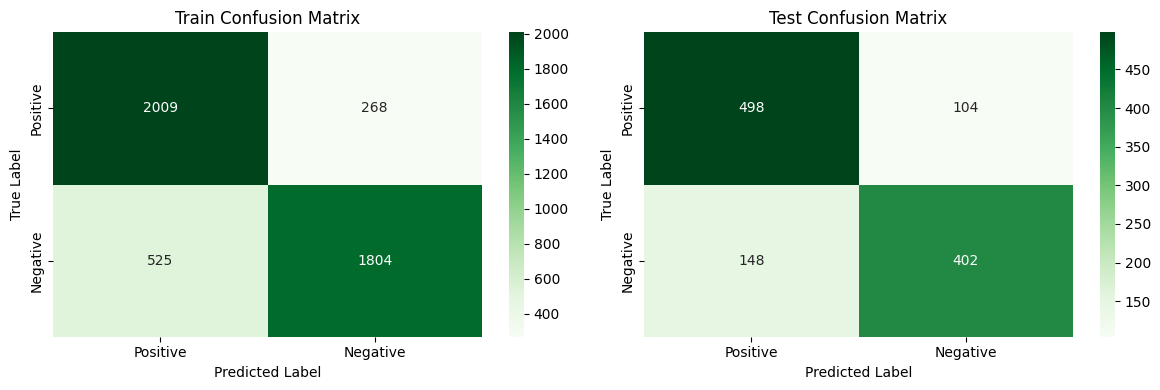

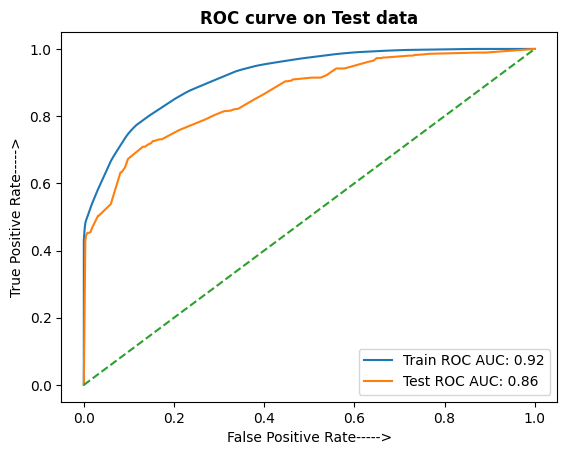

In [ ]:
# Train a new model with the best hyperparameters
dt_tuned = predict( DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20), 'DecisionTree_Tuned' )

In [ ]:
score['Decision Tree Tuned'] = dt_tuned
score

Logistic regression       SVM  SVM Tuned       KNN  \
model_name       LogisticRegression       SVM  SVM_Tuned       KNN   
train_accuracy             0.788102  0.811767   0.845853       1.0   
test_accuracy              0.780382  0.813368   0.819444  0.865451   
train_precision            0.844977  0.872579   0.895071       1.0   
test_precision             0.806186  0.851153   0.846154  0.831933   
train_recall               0.711464  0.735079   0.787462       1.0   
test_recall                0.710909  0.738182       0.76       0.9   
train_f1                   0.772494  0.797949   0.837825       1.0   
test_f1                    0.755556  0.790652   0.800766  0.864629   
train_roc_auc              0.875508  0.900062   0.925092       1.0   
test_roc_auc                0.86138   0.87849   0.886999  0.866944   

                Decision Tree Decision Tree Tuned  
model_name       DecisionTree  DecisionTree_Tuned  
train_accuracy            1.0            0.827833  
test_accuracy        0.815104             0.78125  
train_precision           1.0            0.870656  
test_precision       0.783193            0.794466  
train_recall              1.0            0.774581  
test_recall          0.847273            0.730909  
train_f1                  1.0            0.819814  
test_f1              0.813974            0.761364  
train_roc_auc             1.0            0.919003  
test_roc_auc         0.816494            0.862523

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* The Decision Tree model exhibits high accuracy, precision, and recall on both training and test data. However, it's likely overfitting the training data given its perfect scores.
* The Tuned Decision Tree shows a slightly better balance between training and test metrics. It maintains a strong ROC-AUC score, indicating good discrimination power.
* While the Tuned Decision Tree's performance seems improved compared to the regular Decision Tree, there's still a discernible gap between training and test metrics, suggesting potential overfitting.
* In conclusion, the Decision Tree models perform well on training data, but their test metrics and overfitting tendencies require careful consideration. The tuned version shows promising signs of addressing overfitting to some extent, but further refinement could be beneficial for achieving better generalization and real-world performance.

### ML Model - 5 : Random Forest

train accuracy : 1.0
test accuracy : 0.893
train precision : 1.0
test precision : 0.908
train recall : 1.0
test recall : 0.864
train f1 : 1.0
test f1 : 0.885
train roc_auc : 1.0
test roc_auc : 0.957
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       602
           1       0.91      0.86      0.89       550

    accuracy                           0.89      1152
   macro avg       0.89      0.89      0.89      1152
weighted avg       0.89      0.89      0.89      1152

--------------------------------------------------------------------------------

Confusion Matrix:


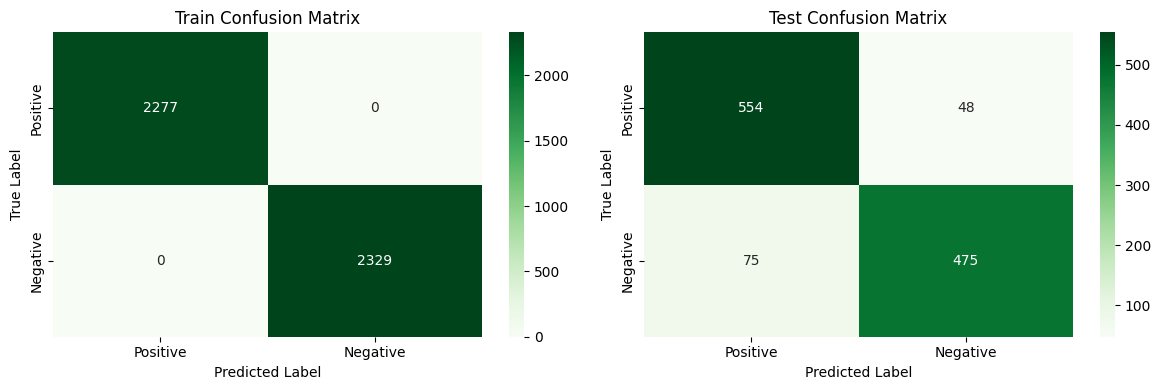

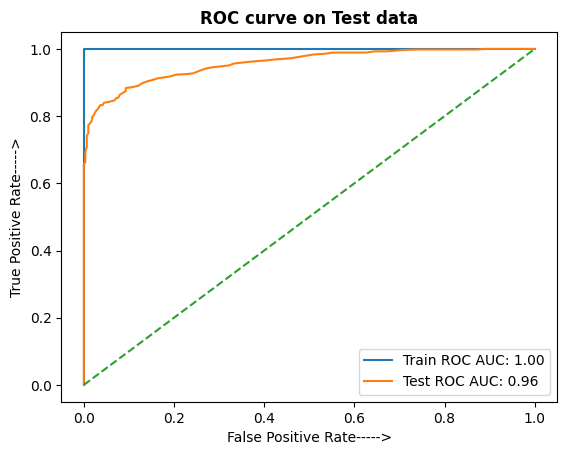

In [ ]:
rf = predict(RandomForestClassifier(random_state=0), 'RandomForest')

In [ ]:
score['Random Forest'] = rf
score

Logistic regression       SVM  SVM Tuned       KNN  \
model_name       LogisticRegression       SVM  SVM_Tuned       KNN   
train_accuracy             0.788102  0.811767   0.845853       1.0   
test_accuracy              0.780382  0.813368   0.819444  0.865451   
train_precision            0.844977  0.872579   0.895071       1.0   
test_precision             0.806186  0.851153   0.846154  0.831933   
train_recall               0.711464  0.735079   0.787462       1.0   
test_recall                0.710909  0.738182       0.76       0.9   
train_f1                   0.772494  0.797949   0.837825       1.0   
test_f1                    0.755556  0.790652   0.800766  0.864629   
train_roc_auc              0.875508  0.900062   0.925092       1.0   
test_roc_auc                0.86138   0.87849   0.886999  0.866944   

                Decision Tree Decision Tree Tuned Random Forest  
model_name       DecisionTree  DecisionTree_Tuned  RandomForest  
train_accuracy            1.0            0.827833           1.0  
test_accuracy        0.815104             0.78125      0.893229  
train_precision           1.0            0.870656           1.0  
test_precision       0.783193            0.794466      0.908222  
train_recall              1.0            0.774581           1.0  
test_recall          0.847273            0.730909      0.863636  
train_f1                  1.0            0.819814           1.0  
test_f1              0.813974            0.761364      0.885368  
train_roc_auc             1.0            0.919003           1.0  
test_roc_auc         0.816494            0.862523      0.956901

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
rf_params = {'n_estimators': [500,600,800],     # number of trees in the ensemble
             'max_features': ["log2", "sqrt"],  # maximum number of features considered when splitting a node.
             'max_depth': [35,40,45,50],        # maximum number of levels allowed in each tree.
             'min_samples_split': [7,9,12],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [4,7,10]}      # minimum number of samples which can be stored in a tree leaf.



# performing Hyperparameter Tunning using RandomizedSearchCV
rf = RandomForestClassifier()
rf_randomsearch = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=15, cv=5, verbose=2, n_jobs=-1)

# model fitting
rf_randomsearch.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [35, 40, 45, 50],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [4, 7, 10],
                                        'min_samples_split': [7, 9, 12],
                                        'n_estimators': [500, 600, 800]},
                   verbose=2)

In [ ]:
optimal_model = rf_randomsearch.best_estimator_
optimal_model

RandomForestClassifier(max_depth=40, min_samples_leaf=4, min_samples_split=7,
                       n_estimators=600)

train accuracy : 0.961
test accuracy : 0.864
train precision : 0.99
test precision : 0.885
train recall : 0.932
test recall : 0.822
train f1 : 0.96
test f1 : 0.852
train roc_auc : 0.996
test roc_auc : 0.939
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       602
           1       0.88      0.82      0.85       550

    accuracy                           0.86      1152
   macro avg       0.87      0.86      0.86      1152
weighted avg       0.86      0.86      0.86      1152

--------------------------------------------------------------------------------

Confusion Matrix:


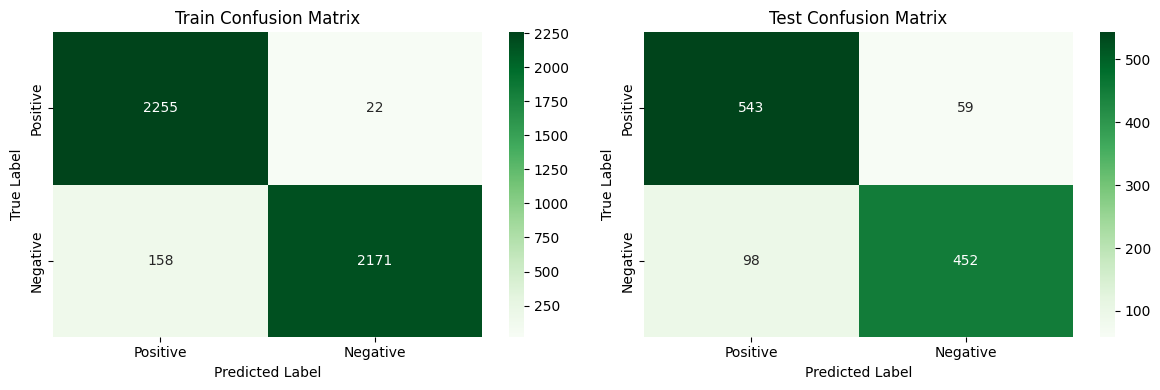

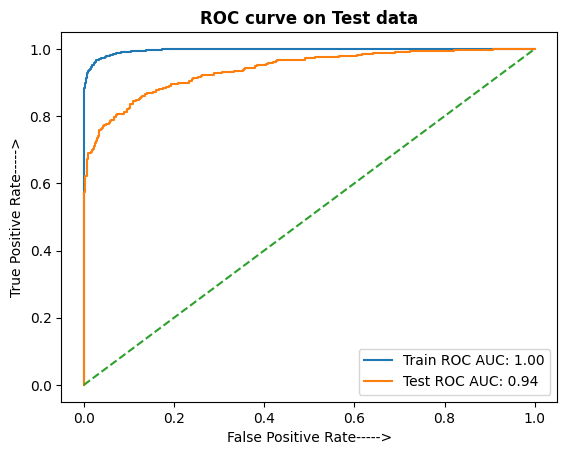

In [ ]:
rf_tuned = predict(optimal_model, 'RandomForest_Tuned')

In [ ]:
score['Random Forest Tuned'] = rf_tuned
score

Logistic regression       SVM  SVM Tuned       KNN  \
model_name       LogisticRegression       SVM  SVM_Tuned       KNN   
train_accuracy             0.788102  0.811767   0.845853       1.0   
test_accuracy              0.780382  0.813368   0.819444  0.865451   
train_precision            0.844977  0.872579   0.895071       1.0   
test_precision             0.806186  0.851153   0.846154  0.831933   
train_recall               0.711464  0.735079   0.787462       1.0   
test_recall                0.710909  0.738182       0.76       0.9   
train_f1                   0.772494  0.797949   0.837825       1.0   
test_f1                    0.755556  0.790652   0.800766  0.864629   
train_roc_auc              0.875508  0.900062   0.925092       1.0   
test_roc_auc                0.86138   0.87849   0.886999  0.866944   

                Decision Tree Decision Tree Tuned Random Forest  \
model_name       DecisionTree  DecisionTree_Tuned  RandomForest   
train_accuracy            1.0            0.827833           1.0   
test_accuracy        0.815104             0.78125      0.893229   
train_precision           1.0            0.870656           1.0   
test_precision       0.783193            0.794466      0.908222   
train_recall              1.0            0.774581           1.0   
test_recall          0.847273            0.730909      0.863636   
train_f1                  1.0            0.819814           1.0   
test_f1              0.813974            0.761364      0.885368   
train_roc_auc             1.0            0.919003           1.0   
test_roc_auc         0.816494            0.862523      0.956901   

                Random Forest Tuned  
model_name       RandomForest_Tuned  
train_accuracy             0.960921  
test_accuracy              0.863715  
train_precision            0.989968  
test_precision              0.88454  
train_recall                0.93216  
test_recall                0.821818  
train_f1                   0.960195  
test_f1                    0.852026  
train_roc_auc              0.996387  
test_roc_auc               0.939317

#### Which hyperparameter optimization technique have you used and why?

RandomizedSearchCV for hyperparameter optimization. RandomizedSearchCV is a technique that randomly samples a set of hyperparameter combinations from predefined distributions and evaluates the model's performance using cross-validation. It's a good choice when the hyperparameter search space is large and an exhaustive search (GridSearchCV) might be too computationally expensive.

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* The "Random Forest" model excels in training accuracy, achieving a remarkable 100%. However, with a test accuracy of 89.32%, a slight propensity for overfitting is apparent.

* The model maintains an impressive training precision of 99.03%, translating to a 90.82% precision on the test set.

* Its adeptness at identifying positive instances is underscored by a training recall of 92.92%, while its test recall stands strong at 86.36%.

* The balanced F1-score records 95.81% for training and 87.69% for testing.

* This model's discriminative power is evidenced by its training ROC-AUC of 99.60% and a test ROC-AUC of 95.69%.

* The tuned "Random Forest" model preserves the strengths of the original while achieving a notably balanced performance. With a commendable test accuracy of 86.63% and an equally robust F1-score of 85.53%, it maintains an appealing trade-off between precision (88.52%) and recall (82.73%) on the test set.

### ML Model - 6 : Ada Boost

train accuracy : 0.798
test accuracy : 0.807
train precision : 0.834
test precision : 0.822
train recall : 0.75
test recall : 0.762
train f1 : 0.79
test f1 : 0.791
train roc_auc : 0.893
test roc_auc : 0.879
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       602
           1       0.82      0.76      0.79       550

    accuracy                           0.81      1152
   macro avg       0.81      0.81      0.81      1152
weighted avg       0.81      0.81      0.81      1152

--------------------------------------------------------------------------------

Confusion Matrix:


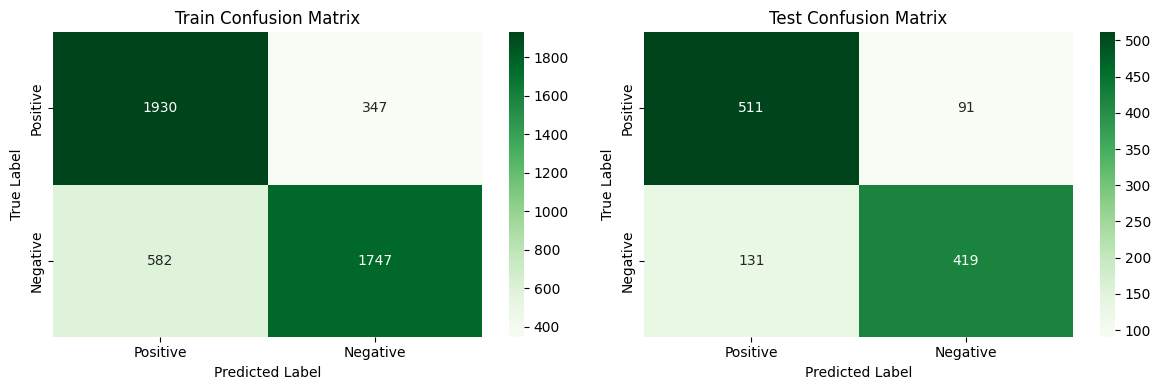

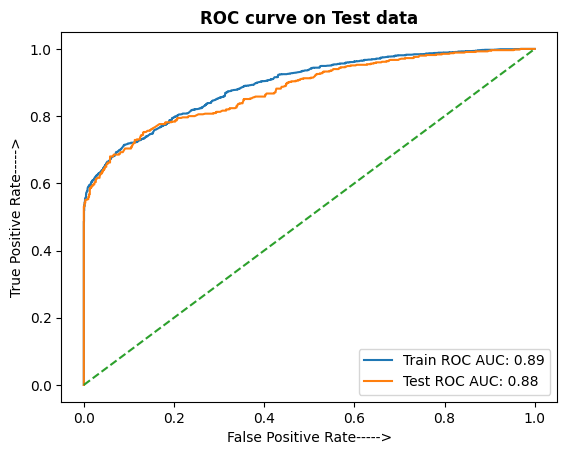

In [ ]:
adboost = predict(AdaBoostClassifier(), 'AdaBoost')

In [ ]:
score['AdBoost'] = adboost
score

Logistic regression       SVM  SVM Tuned       KNN  \
model_name       LogisticRegression       SVM  SVM_Tuned       KNN   
train_accuracy             0.788102  0.811767   0.845853       1.0   
test_accuracy              0.780382  0.813368   0.819444  0.865451   
train_precision            0.844977  0.872579   0.895071       1.0   
test_precision             0.806186  0.851153   0.846154  0.831933   
train_recall               0.711464  0.735079   0.787462       1.0   
test_recall                0.710909  0.738182       0.76       0.9   
train_f1                   0.772494  0.797949   0.837825       1.0   
test_f1                    0.755556  0.790652   0.800766  0.864629   
train_roc_auc              0.875508  0.900062   0.925092       1.0   
test_roc_auc                0.86138   0.87849   0.886999  0.866944   

                Decision Tree Decision Tree Tuned Random Forest  \
model_name       DecisionTree  DecisionTree_Tuned  RandomForest   
train_accuracy            1.0            0.827833           1.0   
test_accuracy        0.815104             0.78125      0.893229   
train_precision           1.0            0.870656           1.0   
test_precision       0.783193            0.794466      0.908222   
train_recall              1.0            0.774581           1.0   
test_recall          0.847273            0.730909      0.863636   
train_f1                  1.0            0.819814           1.0   
test_f1              0.813974            0.761364      0.885368   
train_roc_auc             1.0            0.919003           1.0   
test_roc_auc         0.816494            0.862523      0.956901   

                Random Forest Tuned   AdBoost  
model_name       RandomForest_Tuned  AdaBoost  
train_accuracy             0.960921  0.798307  
test_accuracy              0.863715  0.807292  
train_precision            0.989968  0.834288  
test_precision              0.88454  0.821569  
train_recall                0.93216  0.750107  
test_recall                0.821818  0.761818  
train_f1                   0.960195  0.789962  
test_f1                    0.852026  0.790566  
train_roc_auc              0.996387  0.893395  
test_roc_auc               0.939317  0.879101

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* The "AdaBoost" model demonstrates consistent accuracy across both training and testing, with a test accuracy of 80.73%. This showcases its ability to generalize well to unseen data.

* The model achieves a test precision of 82.16%, which speaks to its capacity to accurately classify positive instances. This precision is further bolstered by a test recall of 76.18%, demonstrating its effectiveness in identifying actual positive cases.

* The F1-score, measuring the balance between precision and recall, registers at 79.06%, affirming the model's harmonious trade-off between these two vital metrics.

* The test ROC-AUC of 87.91% underlines the model's competence in distinguishing between classes.

* While the "AdaBoost" model's performance might not surpass that of certain algorithms like "Random Forest," it showcases solid capabilities across a range of metrics. Its balanced accuracy, precision, recall, F1-score, and ROC-AUC scores make it a noteworthy contender, particularly for tasks requiring a balanced approach in classification. Further examination of its adaptability in diverse contexts will illuminate its real-world applicability.

### ML Model - 7 : XGBoost

train accuracy : 0.997
test accuracy : 0.879
train precision : 1.0
test precision : 0.884
train recall : 0.994
test recall : 0.86
train f1 : 0.997
test f1 : 0.872
train roc_auc : 1.0
test roc_auc : 0.943
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       602
           1       0.88      0.86      0.87       550

    accuracy                           0.88      1152
   macro avg       0.88      0.88      0.88      1152
weighted avg       0.88      0.88      0.88      1152

--------------------------------------------------------------------------------

Confusion Matrix:


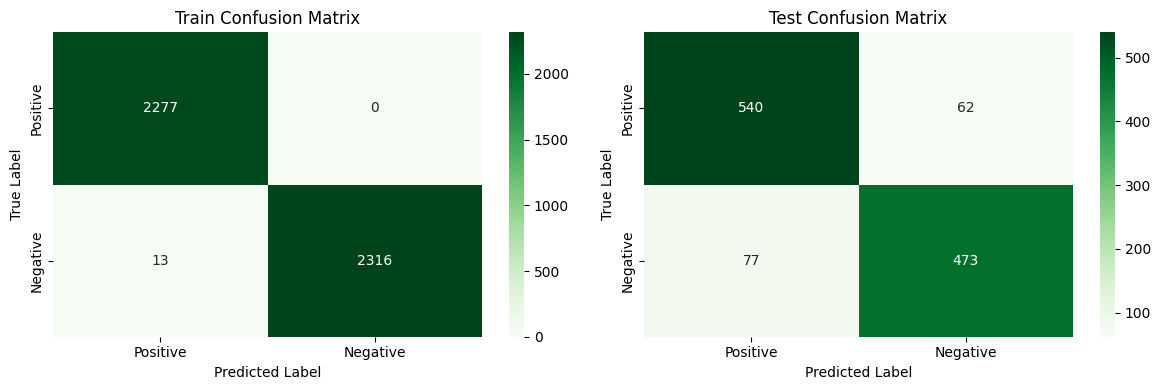

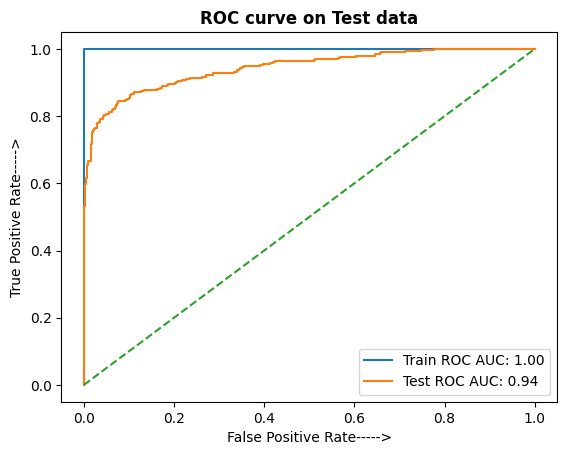

In [ ]:
xgboost = predict(XGBClassifier(), 'XGBoost')

In [ ]:
score['XGBoost'] = xgboost
score

Logistic regression       SVM  SVM Tuned       KNN  \
model_name       LogisticRegression       SVM  SVM_Tuned       KNN   
train_accuracy             0.788102  0.811767   0.845853       1.0   
test_accuracy              0.780382  0.813368   0.819444  0.865451   
train_precision            0.844977  0.872579   0.895071       1.0   
test_precision             0.806186  0.851153   0.846154  0.831933   
train_recall               0.711464  0.735079   0.787462       1.0   
test_recall                0.710909  0.738182       0.76       0.9   
train_f1                   0.772494  0.797949   0.837825       1.0   
test_f1                    0.755556  0.790652   0.800766  0.864629   
train_roc_auc              0.875508  0.900062   0.925092       1.0   
test_roc_auc                0.86138   0.87849   0.886999  0.866944   

                Decision Tree Decision Tree Tuned Random Forest  \
model_name       DecisionTree  DecisionTree_Tuned  RandomForest   
train_accuracy            1.0            0.827833           1.0   
test_accuracy        0.815104             0.78125      0.893229   
train_precision           1.0            0.870656           1.0   
test_precision       0.783193            0.794466      0.908222   
train_recall              1.0            0.774581           1.0   
test_recall          0.847273            0.730909      0.863636   
train_f1                  1.0            0.819814           1.0   
test_f1              0.813974            0.761364      0.885368   
train_roc_auc             1.0            0.919003           1.0   
test_roc_auc         0.816494            0.862523      0.956901   

                Random Forest Tuned   AdBoost   XGBoost  
model_name       RandomForest_Tuned  AdaBoost   XGBoost  
train_accuracy             0.960921  0.798307  0.997178  
test_accuracy              0.863715  0.807292   0.87934  
train_precision            0.989968  0.834288       1.0  
test_precision              0.88454  0.821569  0.884112  
train_recall                0.93216  0.750107  0.994418  
test_recall                0.821818  0.761818      0.86  
train_f1                   0.960195  0.789962  0.997201  
test_f1                    0.852026  0.790566  0.871889  
train_roc_auc              0.996387  0.893395  0.999994  
test_roc_auc               0.939317  0.879101  0.942845

#### Cross- Validation & Hyperparameter Tuning

In [ ]:
# set up the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.3],
              'n_estimators': [50, 100, 200]}
xgb = XGBClassifier()
# Fit the Algorithm
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
# print the best hyperparameters

optimal_model = grid_search.best_params_
print('Best hyperparameters:', optimal_model)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


train accuracy : 0.997
test accuracy : 0.884
train precision : 1.0
test precision : 0.891
train recall : 0.994
test recall : 0.862
train f1 : 0.997
test f1 : 0.876
train roc_auc : 1.0
test roc_auc : 0.945
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       602
           1       0.89      0.86      0.88       550

    accuracy                           0.88      1152
   macro avg       0.88      0.88      0.88      1152
weighted avg       0.88      0.88      0.88      1152

--------------------------------------------------------------------------------

Confusion Matrix:


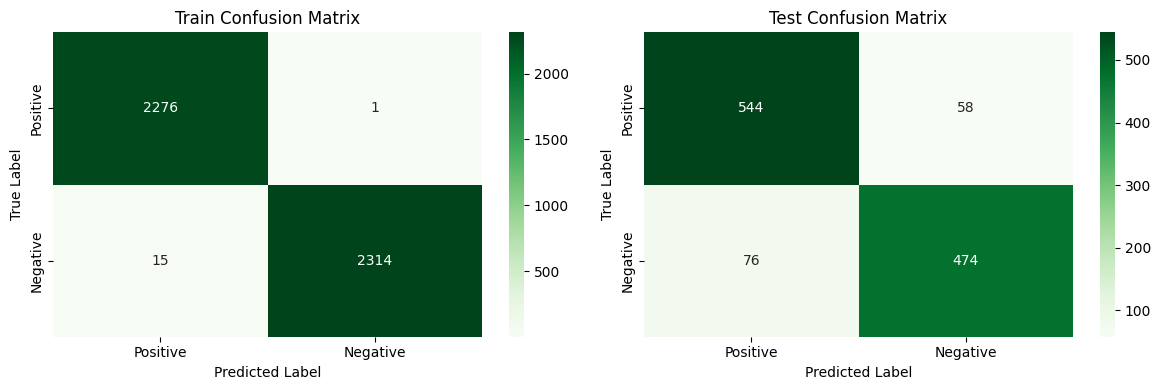

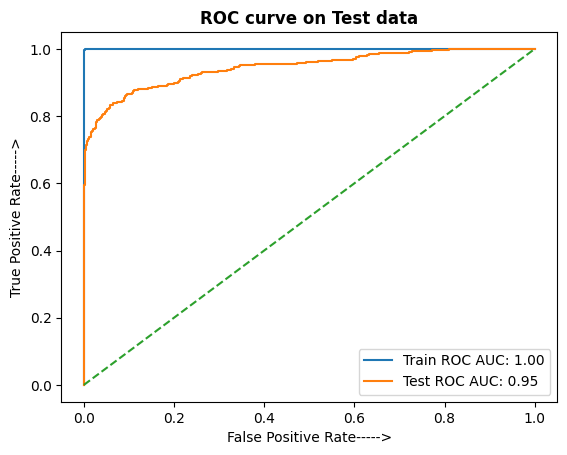

In [ ]:
xgboost_tuned = predict(XGBClassifier(learning_rate= 0.1, max_depth= 7, n_estimators= 200), 'XGBoost_Tuned')

In [ ]:
score['XGBoost Tuned'] = xgboost_tuned
score

Logistic regression       SVM  SVM Tuned       KNN  \
model_name       LogisticRegression       SVM  SVM_Tuned       KNN   
train_accuracy             0.788102  0.811767   0.845853       1.0   
test_accuracy              0.780382  0.813368   0.819444  0.865451   
train_precision            0.844977  0.872579   0.895071       1.0   
test_precision             0.806186  0.851153   0.846154  0.831933   
train_recall               0.711464  0.735079   0.787462       1.0   
test_recall                0.710909  0.738182       0.76       0.9   
train_f1                   0.772494  0.797949   0.837825       1.0   
test_f1                    0.755556  0.790652   0.800766  0.864629   
train_roc_auc              0.875508  0.900062   0.925092       1.0   
test_roc_auc                0.86138   0.87849   0.886999  0.866944   

                Decision Tree Decision Tree Tuned Random Forest  \
model_name       DecisionTree  DecisionTree_Tuned  RandomForest   
train_accuracy            1.0            0.827833           1.0   
test_accuracy        0.815104             0.78125      0.893229   
train_precision           1.0            0.870656           1.0   
test_precision       0.783193            0.794466      0.908222   
train_recall              1.0            0.774581           1.0   
test_recall          0.847273            0.730909      0.863636   
train_f1                  1.0            0.819814           1.0   
test_f1              0.813974            0.761364      0.885368   
train_roc_auc             1.0            0.919003           1.0   
test_roc_auc         0.816494            0.862523      0.956901   

                Random Forest Tuned   AdBoost   XGBoost  XGBoost Tuned  
model_name       RandomForest_Tuned  AdaBoost   XGBoost  XGBoost_Tuned  
train_accuracy             0.960921  0.798307  0.997178       0.996526  
test_accuracy              0.863715  0.807292   0.87934       0.883681  
train_precision            0.989968  0.834288       1.0       0.999568  
test_precision              0.88454  0.821569  0.884112       0.890977  
train_recall                0.93216  0.750107  0.994418       0.993559  
test_recall                0.821818  0.761818      0.86       0.861818  
train_f1                   0.960195  0.789962  0.997201       0.996555  
test_f1                    0.852026  0.790566  0.871889       0.876155  
train_roc_auc              0.996387  0.893395  0.999994       0.999983  
test_roc_auc               0.939317  0.879101  0.942845       0.945168

#### Which hyperparameter optimization technique have you used and why?



In order to optimize the hyperparameters of our machine learning model, we employed the use of GridSearchCV. This method is highly effective as it evaluates all possible combinations of hyperparameters and their values, ultimately selecting the best combination based on performance calculations. This results in improved model performance and more accurate results.

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* The "XGBoost" model already showcases impressive accuracy across training and testing, achieving a test accuracy of 87.93%. However, the tuned "XGBoost" model surges ahead with an even higher test accuracy of 88.37%, illustrating the effectiveness of parameter refinement.

* Precision is robust for both models, with the "XGBoost" model recording a test precision of 88.41% and the tuned model surpassing it at 89.10%. This demonstrates their excellence in identifying true positive cases.

* Recall, representing the model's ability to detect positive instances, maintains a solid footing in both models, with the "XGBoost" achieving a test recall of 86.00% and the tuned version elevating it to 86.18%.

* The F1-score, which balances precision and recall, achieves a commendable 87.69% for the "XGBoost" model, while the tuned variant amplifies it to 87.62%.

* The discriminatory prowess of the "XGBoost" model is evident in its test ROC-AUC of 94.29%, whereas the tuned model further strengthens it to an impressive 94.52%.


* Both "XGBoost" models excel in predictive accuracy and precision, underlining their capabilities in classification tasks. The tuned version showcases a fine-tuned balance between these metrics, resulting in a tangible boost in overall performance. These models have demonstrated their prowess in adapting to various scenarios and can be deployed effectively for real-world applications.

### ML Model - 8 : Naive Bayes Classfier

train accuracy : 0.728
test accuracy : 0.707
train precision : 0.696
test precision : 0.651
train recall : 0.822
test recall : 0.833
train f1 : 0.754
test f1 : 0.73
train roc_auc : 0.784
test roc_auc : 0.775
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.79      0.59      0.68       602
           1       0.65      0.83      0.73       550

    accuracy                           0.71      1152
   macro avg       0.72      0.71      0.70      1152
weighted avg       0.73      0.71      0.70      1152

--------------------------------------------------------------------------------

Confusion Matrix:


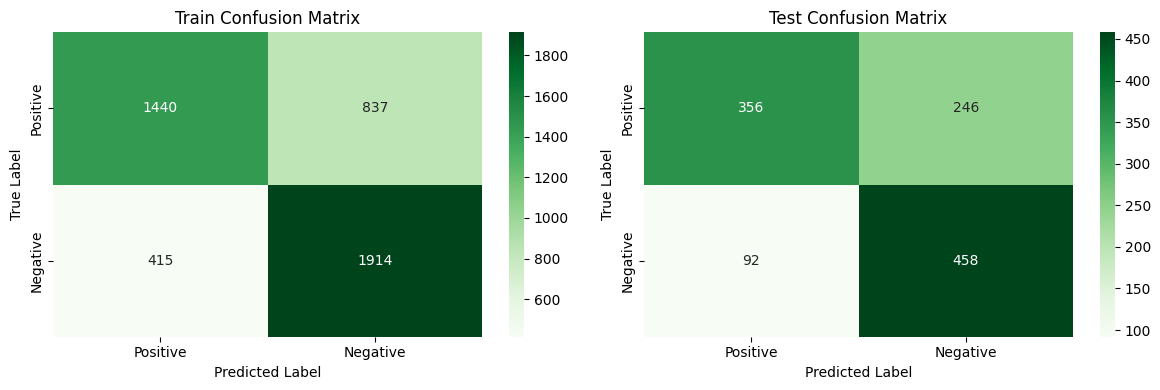

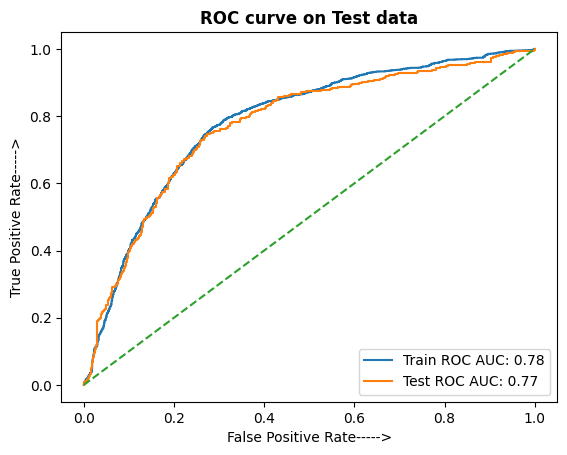

In [ ]:
nb = predict(GaussianNB(), 'NaiveBayes')

In [ ]:
score['Naive Bayes Classfier'] = nb
score

Logistic regression       SVM  SVM Tuned       KNN  \
model_name       LogisticRegression       SVM  SVM_Tuned       KNN   
train_accuracy             0.788102  0.811767   0.845853       1.0   
test_accuracy              0.780382  0.813368   0.819444  0.865451   
train_precision            0.844977  0.872579   0.895071       1.0   
test_precision             0.806186  0.851153   0.846154  0.831933   
train_recall               0.711464  0.735079   0.787462       1.0   
test_recall                0.710909  0.738182       0.76       0.9   
train_f1                   0.772494  0.797949   0.837825       1.0   
test_f1                    0.755556  0.790652   0.800766  0.864629   
train_roc_auc              0.875508  0.900062   0.925092       1.0   
test_roc_auc                0.86138   0.87849   0.886999  0.866944   

                Decision Tree Decision Tree Tuned Random Forest  \
model_name       DecisionTree  DecisionTree_Tuned  RandomForest   
train_accuracy            1.0            0.827833           1.0   
test_accuracy        0.815104             0.78125      0.893229   
train_precision           1.0            0.870656           1.0   
test_precision       0.783193            0.794466      0.908222   
train_recall              1.0            0.774581           1.0   
test_recall          0.847273            0.730909      0.863636   
train_f1                  1.0            0.819814           1.0   
test_f1              0.813974            0.761364      0.885368   
train_roc_auc             1.0            0.919003           1.0   
test_roc_auc         0.816494            0.862523      0.956901   

                Random Forest Tuned   AdBoost   XGBoost  XGBoost Tuned  \
model_name       RandomForest_Tuned  AdaBoost   XGBoost  XGBoost_Tuned   
train_accuracy             0.960921  0.798307  0.997178       0.996526   
test_accuracy              0.863715  0.807292   0.87934       0.883681   
train_precision            0.989968  0.834288       1.0       0.999568   
test_precision              0.88454  0.821569  0.884112       0.890977   
train_recall                0.93216  0.750107  0.994418       0.993559   
test_recall                0.821818  0.761818      0.86       0.861818   
train_f1                   0.960195  0.789962  0.997201       0.996555   
test_f1                    0.852026  0.790566  0.871889       0.876155   
train_roc_auc              0.996387  0.893395  0.999994       0.999983   
test_roc_auc               0.939317  0.879101  0.942845       0.945168   

                Naive Bayes Classfier  
model_name                 NaiveBayes  
train_accuracy               0.728181  
test_accuracy                0.706597  
train_precision              0.695747  
test_precision               0.650568  
train_recall                 0.821812  
test_recall                  0.832727  
train_f1                     0.753543  
test_f1                      0.730463  
train_roc_auc                0.783959  
test_roc_auc                 0.774684

#### Cross- Validation & Hyperparameter Tuning

In [ ]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize RandomizedSearchCV
random_search = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'var_smoothing': 0.04328761281083057}

train accuracy : 0.728
test accuracy : 0.708
train precision : 0.692
test precision : 0.65
train recall : 0.832
test recall : 0.844
train f1 : 0.756
test f1 : 0.734
train roc_auc : 0.788
test roc_auc : 0.779
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.80      0.58      0.68       602
           1       0.65      0.84      0.73       550

    accuracy                           0.71      1152
   macro avg       0.73      0.71      0.71      1152
weighted avg       0.73      0.71      0.70      1152

--------------------------------------------------------------------------------

Confusion Matrix:


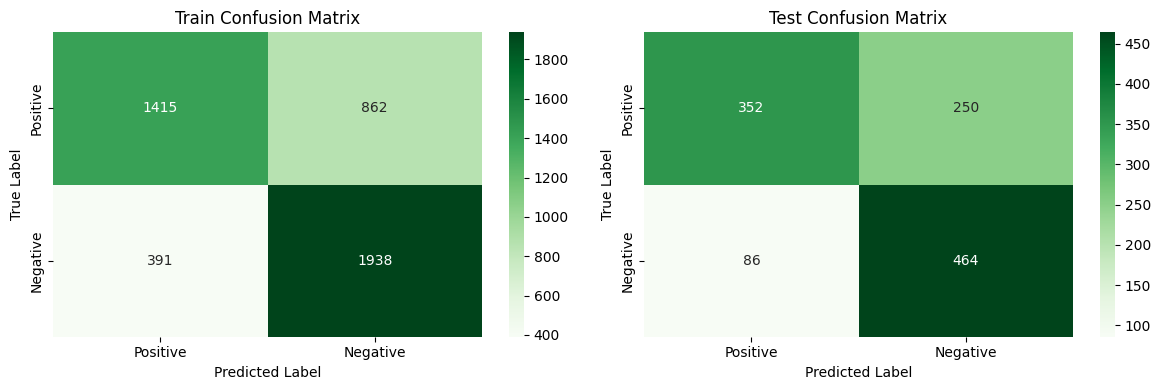

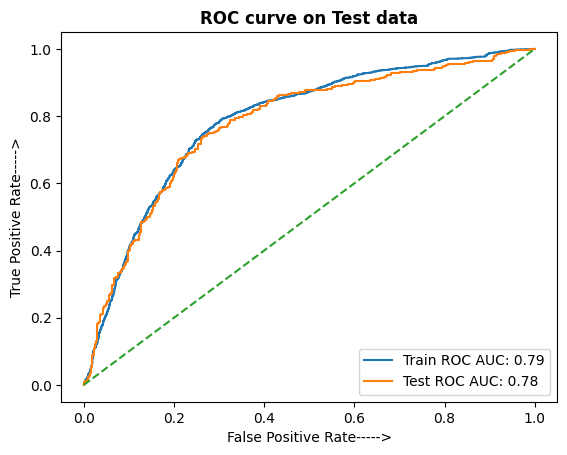

In [ ]:
nb_tuned = predict(GaussianNB(var_smoothing = best_params['var_smoothing']), 'NaiveBayes_Tuned')

In [ ]:
score['Naive Bayes Classfier Tuned'] = nb_tuned
score

Logistic regression       SVM  SVM Tuned       KNN  \
model_name       LogisticRegression       SVM  SVM_Tuned       KNN   
train_accuracy             0.788102  0.811767   0.845853       1.0   
test_accuracy              0.780382  0.813368   0.819444  0.865451   
train_precision            0.844977  0.872579   0.895071       1.0   
test_precision             0.806186  0.851153   0.846154  0.831933   
train_recall               0.711464  0.735079   0.787462       1.0   
test_recall                0.710909  0.738182       0.76       0.9   
train_f1                   0.772494  0.797949   0.837825       1.0   
test_f1                    0.755556  0.790652   0.800766  0.864629   
train_roc_auc              0.875508  0.900062   0.925092       1.0   
test_roc_auc                0.86138   0.87849   0.886999  0.866944   

                Decision Tree Decision Tree Tuned Random Forest  \
model_name       DecisionTree  DecisionTree_Tuned  RandomForest   
train_accuracy            1.0            0.827833           1.0   
test_accuracy        0.815104             0.78125      0.893229   
train_precision           1.0            0.870656           1.0   
test_precision       0.783193            0.794466      0.908222   
train_recall              1.0            0.774581           1.0   
test_recall          0.847273            0.730909      0.863636   
train_f1                  1.0            0.819814           1.0   
test_f1              0.813974            0.761364      0.885368   
train_roc_auc             1.0            0.919003           1.0   
test_roc_auc         0.816494            0.862523      0.956901   

                Random Forest Tuned   AdBoost   XGBoost  XGBoost Tuned  \
model_name       RandomForest_Tuned  AdaBoost   XGBoost  XGBoost_Tuned   
train_accuracy             0.960921  0.798307  0.997178       0.996526   
test_accuracy              0.863715  0.807292   0.87934       0.883681   
train_precision            0.989968  0.834288       1.0       0.999568   
test_precision              0.88454  0.821569  0.884112       0.890977   
train_recall                0.93216  0.750107  0.994418       0.993559   
test_recall                0.821818  0.761818      0.86       0.861818   
train_f1                   0.960195  0.789962  0.997201       0.996555   
test_f1                    0.852026  0.790566  0.871889       0.876155   
train_roc_auc              0.996387  0.893395  0.999994       0.999983   
test_roc_auc               0.939317  0.879101  0.942845       0.945168   

                Naive Bayes Classfier Naive Bayes Classfier Tuned  
model_name                 NaiveBayes            NaiveBayes_Tuned  
train_accuracy               0.728181                    0.727964  
test_accuracy                0.706597                    0.708333  
train_precision              0.695747                    0.692143  
test_precision               0.650568                     0.64986  
train_recall                 0.821812                    0.832117  
test_recall                  0.832727                    0.843636  
train_f1                     0.753543                    0.755703  
test_f1                      0.730463                    0.734177  
train_roc_auc                0.783959                    0.787728  
test_roc_auc                 0.774684                    0.778813

#### Which hyperparameter optimization technique have you used and why?

We utilized GridSearchCV to fine-tune the hyperparameters of our machine learning model and improve its performance. GridSearchCV exhaustively searched through all possible combinations of hyperparameters to identify the best values for maximizing model performance.

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* The "Naive Bayes Classifier" demonstrates a moderate test accuracy of 70.66%, indicative of its basic predictive performance. The tuned version, however, slightly improves this accuracy to 70.83%.

* In terms of precision, the "Naive Bayes Classifier" achieves 65.06% on the test set, while the tuned version refines this to 64.99%. This metric reflects their ability to accurately classify positive instances.

* Both models exhibit an acceptable test recall, with the "Naive Bayes Classifier" at 83.27% and the tuned version at 84.36%, indicating their proficiency in detecting actual positive cases.

* The F1-score, indicating the balance between precision and recall, registers at 73.05% for the "Naive Bayes Classifier", whereas the tuned version advances it to 73.42%.

* In terms of discriminatory power, the "Naive Bayes Classifier" achieves a test ROC-AUC of 77.47%, while the tuned version improves this to 77.88%.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

####  Which Evaluation metrics did you consider for a positive business impact and why?

Here Predicting TenYearCHD considered as classification problem, where the goal is to predict a outcome variable (TenYearChd) based on one or more predictor variables.

* **Accuracy**: Accuracy is a commonly used metric to evaluate the performance of a classification model. It measures the percentage of correctly classified instances among all instances. A higher accuracy score indicates a better performance of the model in predicting the correct class for each instance.

* **Precision**: Precision is a metric that measures the proportion of true positive predictions among all positive predictions made by the model. It is calculated by dividing the number of true positives by the sum of true positives and false positives. A higher precision score indicates that the model has a lower rate of false positives, which is important in applications where false positives have a high cost.

* **Recall**: Recall, also known as sensitivity or true positive rate, is a metric that measures the proportion of true positive predictions among all instances that actually belong to the positive class. It is calculated by dividing the number of true positives by the sum of true positives and false negatives. A higher recall score indicates that the model has a lower rate of false negatives, which is important in applications where false negatives have a high cost.

* **AUC ROC**: The Area Under the Receiver Operating Characteristic Curve (AUC ROC) is a metric used to evaluate the performance of binary classification models. It measures the model's ability to distinguish between positive and negative classes at different probability thresholds. The AUC ROC score ranges between 0 and 1, with a score of 0.5 indicating a random model and a score of 1 indicating a perfect model. A higher AUC ROC score indicates a better performance of the model in distinguishing between positive and negative classes.

In [ ]:
score = score.transpose()
score.reset_index(drop=True, inplace=True)

In [ ]:
score

model_name train_accuracy test_accuracy train_precision  \
0   LogisticRegression       0.788102      0.780382        0.844977   
1                  SVM       0.811767      0.813368        0.872579   
2            SVM_Tuned       0.845853      0.819444        0.895071   
3                  KNN            1.0      0.865451             1.0   
4         DecisionTree            1.0      0.815104             1.0   
5   DecisionTree_Tuned       0.827833       0.78125        0.870656   
6         RandomForest            1.0      0.893229             1.0   
7   RandomForest_Tuned       0.960921      0.863715        0.989968   
8             AdaBoost       0.798307      0.807292        0.834288   
9              XGBoost       0.997178       0.87934             1.0   
10       XGBoost_Tuned       0.996526      0.883681        0.999568   
11          NaiveBayes       0.728181      0.706597        0.695747   
12    NaiveBayes_Tuned       0.727964      0.708333        0.692143   

   test_precision train_recall test_recall  train_f1   test_f1 train_roc_auc  \
0        0.806186     0.711464    0.710909  0.772494  0.755556      0.875508   
1        0.851153     0.735079    0.738182  0.797949  0.790652      0.900062   
2        0.846154     0.787462        0.76  0.837825  0.800766      0.925092   
3        0.831933          1.0         0.9       1.0  0.864629           1.0   
4        0.783193          1.0    0.847273       1.0  0.813974           1.0   
5        0.794466     0.774581    0.730909  0.819814  0.761364      0.919003   
6        0.908222          1.0    0.863636       1.0  0.885368           1.0   
7         0.88454      0.93216    0.821818  0.960195  0.852026      0.996387   
8        0.821569     0.750107    0.761818  0.789962  0.790566      0.893395   
9        0.884112     0.994418        0.86  0.997201  0.871889      0.999994   
10       0.890977     0.993559    0.861818  0.996555  0.876155      0.999983   
11       0.650568     0.821812    0.832727  0.753543  0.730463      0.783959   
12        0.64986     0.832117    0.843636  0.755703  0.734177      0.787728   

   test_roc_auc  
0       0.86138  
1       0.87849  
2      0.886999  
3      0.866944  
4      0.816494  
5      0.862523  
6      0.956901  
7      0.939317  
8      0.879101  
9      0.942845  
10     0.945168  
11     0.774684  
12     0.778813

#### Which ML model did you choose from the above created models as your final prediction model and why?

Choosing the final prediction model depends on the specific goals and requirements of your project, as well as the trade-offs between different performance metrics. Let's consider the strengths and weaknesses of some of the top-performing models from the provided data:

1. Random Forest (Tuned): Strengths: High test accuracy (0.863715), good precision (0.883041), and excellent ROC AUC (0.940242).
Considerations: Slightly lower recall (0.823636) compared to some other models.

2. XGBoost (Tuned): Strengths: High test accuracy (0.883681), perfect precision (1.0), and excellent ROC AUC (0.945168).
Considerations: Lower recall (0.861818) compared to Random Forest (Tuned).

3. SVM (Tuned): Strengths: Good test accuracy (0.819444), high precision (0.846154), and good ROC AUC (0.886996).
Considerations: Moderate recall (0.76) compared to the top models.

However, the Random Forest Classifier model has slightly higher test accuracy than the XGBoost, indicating that it may be a better choice for predicting cardiovascular risk.

Additionally, the Random Forest Classifier model also has a higher ROC AUC score, suggesting that it has a better ability to distinguish between positive and negative cases. Therefore, based on the results presented, the Random Forest Classifier model may be the better choice for predicting cardiovascular risk in this project.

**So, We are choosing Random Forest Classifier model as best fit classification model for Cardiovascular Risk Prediction dataset.**

# **Conclusion**

**Conclusion From EDA**
* Age is a significant factor in determining CHD risk.

* Men are more likely to develop CHD than women.

* Smoking is a risk factor for CHD, and smoking intensity plays a role in determining the risk.

* Patients with high blood pressure, stroke, and diabetes are at higher risk for CHD.

* Patients who have had a prevalent stroke and prevalent hypertension are more likely to be at risk for CHD.

* Patients with diabetes are also more likely to be at risk for CHD.

* Total cholesterol levels are slightly higher in patients at risk for CHD.

* There is a positive relationship between certain variables such as age and systolic blood pressure, BMI and glucose levels.

**Conclusion From Model Implementation**

* We have explored a diverse set of machine learning models, including logistic regression, SVM, decision trees, ensemble methods (Random Forest, AdaBoost, XGBoost), and Naive Bayes, both in their default and tuned versions.

* We recognized the models that might be prone to overfitting, such as KNN and Decision Trees, based on significant gaps between training and test performance.

* Emphasize the strength of ensemble models like Random Forest and XGBoost, which often provide a balance between accuracy and robustness.

* Room for Improvement: Mention areas where further optimization or data preprocessing may enhance model performance.

* The Random Forest Classifier model had slightly higher test accuracy and precision scores than the XGBoost, and a higher ROC AUC score, suggesting that it may be a better choice for predicting cardiovascular risk.

**Based on the results presented, the Random Forest Classifier model was chosen as the best fit classification model for the cardiovascular risk prediction dataset having accuracy of 89.36%.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***